
# Project: Child Mortality Rate

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>  
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we are interested in finding out the trend in child mortality in the world for the year 2010. More specifically, we would like to answer the following questions: <br>

1) Is there a stark difference regarding child mortality across different regions in the world? <br>

2) Is improved sanitation associated with a reduction in child mortality? <br>

3) Does government spending on health negatively correlate with child mortality? <br>

4) Is there a negative correlation between life expectancy and child mortality?

With these questions,  one dependent variable (child mortality) and three independent variables (improved sanitation, government spending on health, and life expectancy) are identified.

In [505]:
# First, import necessary packages for data wrangling and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

To prepare for the data analysis process, five sets of data from the Gapminder website have been downloaded. They are:
+  Child mortality rate <br> 
+  Improved sanitation proportion <br> 
+  Health spending (Government spending on health) <br> 
+  Life expectancy <br> 
+  Geography <br> 

In the data cleaning process, these data sets will be merged and the final dataset will comprise the desired year (2010), all the world's main regions, and the interested variables (1 dependent and 3 independent variables previously stated) to answer the aforementioned four questions.

### Data exploration

First, we will load all the necessary datasets, inspect data types, and look for instances of missing data. We will perform this one dataset at a time. Since we are only interested in the year 2010, we will filter all the datasets to reflect variables for this particular year. 

#### 1) Child mortality <br>
Child mortality dataset comprises data that indicates the number of deaths per 1000 live births per year for countries in different regions on Earth.

In [506]:
# Load data and take a look at the first few lines
child_mortality = pd.read_csv('child_mortality.csv')
child_mortality.head(3) # See the first three lines

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1


In [507]:
# See the summary of our data. We can see that there are 193 countries 
    # and the period involved is 1800 to 2018. 
    # The data types (1 object for countries and 219 for child mortality rate) are appropriate.
child_mortality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 220 entries, geo to 2018
dtypes: float64(219), object(1)
memory usage: 331.8+ KB


Filter the dataset to the year '2010' and check for missing value. There is none.

In [508]:
# Get the two columns needed for our new dataset: 
    # 'geo' for countries and '2010' for our year of interest
year_cm = ['geo','2010'] 

child_mortality = child_mortality[year_cm] 

# Check for missing values. This returns the total number of missing values. 
    # There is none in this case.
child_mortality.isnull().sum()

geo     0
2010    0
dtype: int64

In [509]:
# Double check to see the dimension of our new dataset. There are 193 rows (countries) and
    # two columns (country name and child mortality rate in 2010)
child_mortality.shape 

(193, 2)

In [510]:
# Take a look at the first few rows for the new dataset to make sure everything looks good.
child_mortality.head(3)

,geo,2010
0,Afghanistan,90.2
1,Albania,16.6
2,Algeria,27.3


Now, we have the filtered data with countries and the child mortality rate for the year 2010, as we wished. 

#### 2) Geography <br>
The first question is about child mortality difference in various regions of the world; therefore, the regions that countries are part of are to be incorporated into the final clean dataset. We will use the dataset 'geography.csv' which includes names and regions of world's countries.

In [511]:
# Read in geography
geography = pd.read_csv('geography.csv')

# Take a look at the first three lines to familiarize ourselves with this dataset
geography.head(3)

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.0,20.0,14/12/1955,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.0,3.0,8/10/1962,Middle East & North Africa,Upper middle income


There are a few types of region classification involved. Let's explore the unique values for a few interested regions.

In [512]:
# df['column'].unique() will return all the unique values for the filtered column
# Let's apply '.unique()' to get the unique values for each region type.

# Get the unique regions in 'eight_regions' column
geography['eight_regions'].unique()

array(['asia_west', 'europe_east', 'africa_north', 'europe_west',
       'africa_sub_saharan', 'america_north', 'america_south',
       'east_asia_pacific'], dtype=object)

In [513]:
# Get the unique regions in 'six_regions' column
geography['six_regions'].unique()

array(['south_asia', 'europe_central_asia', 'middle_east_north_africa',
       'sub_saharan_africa', 'america', 'east_asia_pacific'], dtype=object)

In [514]:
# Get the unique regions in 'World bank income group 2017' column
geography['World bank income group 2017'].unique()

array(['Low income', 'Upper middle income', 'High income',
       'Lower middle income', nan], dtype=object)

In [515]:
# # Get the unique regions in 'World bank region' column
geography['World bank region'].unique()

array(['South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America', nan], dtype=object)

From the above result, let's filter the dataset to zoom in onto specific regions of interest and check for missing values.

In [516]:
# Filter out our regions of interest from 'geography.' 
    # We are interested in all regions except for 'World bank region'
regions = geography[['name', 'four_regions', 'eight_regions',
                    'six_regions', 'World bank income group 2017']]

# Check for missing value. This should give us the count of missing values in each column.
regions.isnull().sum()

name                            0
four_regions                    0
eight_regions                   0
six_regions                     0
World bank income group 2017    1
dtype: int64

We have one missing value. Let's see which country has missing value for 'World bank income group 2017'

In [517]:
# Utilize 'np.where()' and chain with 'is.na()' to return the index of missing value 
    # in the 'World bank income group 2017' column
# Note: We follow one of the suggestions from this link
# https://stackoverflow.com/questions/14016247/
    # find-integer-index-of-rows-with-nan-in-pandas-dataframe
np.where(regions['World bank income group 2017'].isna()) 

(array([72]),)

In [518]:
# Explore the missing data
regions.iloc[72] 

name                                       Holy See
four_regions                                 europe
eight_regions                           europe_west
six_regions                     europe_central_asia
World bank income group 2017                    NaN
Name: 72, dtype: object

Holy See is not a country (https://www.worldatlas.com/articles/what-is-the-difference-between-vatican-city-and-the-holy-see.html). So eventually, when we merge the dataframe 'regions' to our dataset, it will get dropped. We do not have to do anything about it now.

#### 3) Health Spending <br>
This dataset shows the goverment expenditure on health per capita in USD.

Let's read in the data.

In [519]:
# Read in the data
health_spending = pd.read_csv('health_spending.csv')

# Explore the first few lines
health_spending.head(3)

,Per capita government expenditure on health at average exchange rate (US$),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.61416,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data to the year 2010 and check for missing values. Prior to filtering, we should change the first column name for readability.

In [520]:
# Change first column name to 'Expenditure (USD)' for readability
health_spending.rename(
columns = {'Per capita government expenditure on health at average exchange rate (US$)':
           'Expenditure (USD)'},
inplace = True)

# Filter data for year 2010. Subset only two columns 'Expenditure (USD)' for country name 
    # and '2010' for health spending values
cols_hs = ['Expenditure (USD)','2010']
health_spending = health_spending[cols_hs]

In [521]:
# Count how many missing values in the new dataset
health_spending.isnull().sum()

Expenditure (USD)     0
2010                 78
dtype: int64

There are 78 missing values out of the 265 countries, which is odd since there are only 193 countries. We will explore this at further depth in the data cleaning process.

In [522]:
# Get the dimension of the new dataset. There are 265 rows (countries) and two columns 
    # (health spending values and country name)
health_spending.shape

(265, 2)

#### 4) Improved Sanitation <br>
This dataset shows the proportion of the population in each country using improved sanitation facilities over the years.

In [523]:
# Read in the data
improved_sanitation = pd.read_csv('improved_sanitation.csv', sep=',', engine='python')

# Note: we choose to include 'sep' and 'engine' because reading in the file the regular way 
    # gave errors due to encoding. To be able to read in the file, 
    #we decided to follow the advice from this page
    # https://stackoverflow.com/questions/12468179/
        # unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c

# Check first three lines
improved_sanitation.head(3) 

,"Proportion of the population using improved sanitation facilities, total",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,29.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0,...,32.0,33.0,34.0,34.0,35.0,35.0,37.0,37.0,37.0,37.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data to the year 2010 and check for missing values. Just like before, we will change the first column name to 'Country' for better readability.

In [524]:
# Change one column name for readability
improved_sanitation.rename(
columns = {'Proportion of the population using improved sanitation facilities, total':'Country'},
inplace = True)

# Filter our data to include country name and values for improved sanitation
cols_is = ['Country', '2010']
improved_sanitation = improved_sanitation[cols_is]

In [525]:
# Check for missing values
improved_sanitation.isnull().sum()

Country      0
2010       104
dtype: int64

 There are 104 missing values out of the 275 countries, which is also odd since there are only 193 countries. We will take the same approach and look at this in more detail in the data cleaning process.

In [526]:
# Get the dimension of the newly filtered dataset. There are 275 rows (countries) 
    # and two columns (Country and improved sanitation proportion for 2010)
improved_sanitation.shape

(275, 2)

#### 5) Life expectancy
Life expectancy indicates the average time (in number of years) a population is expected to live.

In [527]:
# Read in the data
life_expectancy = pd.read_csv('life_expectancy.csv', sep = ',', engine = 'python')

# Note: we choose to include 'sep' and 'engine' because reading in the file the regular way 
    # gave errors due to encoding. To be able to read in the file, 
    #we decided to follow the advice from this page
    # https://stackoverflow.com/questions/12468179/
        # unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
        
# Check the first three lines
life_expectancy.head(3)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data to the year 2010 and check for missing values. 

In [528]:
# Filter the data, choosing to keep only two columns that show country names 
    # and life expectancy for 2010
cols_le = ['Life expectancy', '2010']
life_expectancy = life_expectancy[cols_le]

In [529]:
# Count the total missing values
life_expectancy.isnull().sum()

Life expectancy    739
2010               791
dtype: int64

There are 739 missing values out of the 999 countries, which poses doubts since there are only 193 countries. Also, there are 791 missing values in the column '2010'. Like before, let's take the same approach and look at this in more detail in the data cleaning process.

In [530]:
# Get the dimension for the newly filtered data shape. There are 999 values for country names 
    # and two columns (country namd and life expectancy for 2010)
life_expectancy.shape

(999, 2)

 ### Data Cleaning 

It's quite clear that the data is nowhere near the quality we need to perform Exploratory Data Analysis. Therefore, we have to make sure it is clean first. There are three steps we will take in data cleaning. <br>
+  First, we will rename the columns in a systematic approach. We want to make sure the column names are short and indicative of the content they convey.
+  Second, we will merge our five data sets.
+  Third, we will impute missing values for each variable in the final dataset. We will approach each case individually.

#### Step 1: Renaming Columns <br>
First of all, let's rename the first column in each data set to 'Country' and the second column to the corresponding variable. 

In [531]:
# Improved Sanitation

# Check the column names
improved_sanitation.columns

Index(['Country', '2010'], dtype='object')

In [532]:
# Rename the two columns to 'Country' and 'Improved Sanitation Proportion'
improved_sanitation.columns = ['Country', 'Improved Sanitation Proportion']

# Check the first few lines of the new dataframe
improved_sanitation.head(3) # good to go

,Country,Improved Sanitation Proportion
0,Abkhazia,NaN
1,Afghanistan,37.0
2,Akrotiri and Dhekelia,NaN


In [533]:
# Health Spending

# Check the column names
health_spending.columns

Index(['Expenditure (USD)', '2010'], dtype='object')

In [534]:
# Rename the two columns to 'Country' and 'Government Expenditure on Health (USD)'
health_spending.columns = ['Country', 'Government Expenditure on Health (USD)']

# Check the first few lines of the new dataframe
health_spending.head(3) # good to go

,Country,Government Expenditure on Health (USD)
0,Abkhazia,NaN
1,Afghanistan,4.390408
2,Akrotiri and Dhekelia,NaN


In [535]:
# Child mortality

# Check the column names
child_mortality.columns

Index(['geo', '2010'], dtype='object')

In [536]:
# Rename the two columns to 'Country' and 'Child Mortality Rate'
child_mortality.columns = ['Country', 'Child Mortality Rate']

# Check the first few lines of the new dataframe
child_mortality.head(3) # good to go

,Country,Child Mortality Rate
0,Afghanistan,90.2
1,Albania,16.6
2,Algeria,27.3


In [537]:
# Life expectancy

# Check the column names
life_expectancy.columns

Index(['Life expectancy', '2010'], dtype='object')

In [538]:
# Rename the two columns to 'Country' and 'Life Expectancy'
life_expectancy.columns = ['Country', 'Life Expectancy']

# Check the first few lines of the new dataframe
life_expectancy.head(3) # good to go

,Country,Life Expectancy
0,Abkhazia,NaN
1,Afghanistan,53.6
2,Akrotiri and Dhekelia,NaN


In [539]:
# Regions

# Check the column names
regions.columns

Index(['name', 'four_regions', 'eight_regions', 'six_regions',
       'World bank income group 2017'],
      dtype='object')

According to this link (https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups), the World Bank classifies the world into 7 regions; therefore, we will drop the 'six_regions' column and keep the rest: four regions for overall analysis, eight regions for more granular analysis, and world bank income group in case we want to have further analysis.

In [540]:
# Use 'del' to delete the 'six_regions' column
del regions['six_regions']

In [541]:
# Check the column names again, we should have no 'six_regions' column
regions.columns

Index(['name', 'four_regions', 'eight_regions',
       'World bank income group 2017'],
      dtype='object')

In [542]:
# Rename the four columns in 'regions' to 
    # 'Country', 'Four Regions','Eight Regions', 'World Bank Income Group'
regions.columns = ['Country', 'Four Regions','Eight Regions', 'World Bank Income Group']

# Check the first few lines of the new dataframe
regions.head(3) # good to go

,Country,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,asia,asia_west,Low income
1,Albania,europe,europe_east,Upper middle income
2,Algeria,africa,africa_north,Upper middle income


#### Step 2: Data merging <br>
Before merging the datasets, let's look at the missing value pattern and gather all the necessary information to prepare for the missing data imputation process. <br>

As noted above, the three datasets: "health_spending" ,"improved_sanitation", and "life_expectancy" have missing values. Our initial guess is it has something to do with the countries as it seems there are many more countries than the actual number of countries in the world. To look further into this, we will utilize the '.nunique()' method to explore these datasets.

In [543]:
# Get the total count of unique values, in this case unique countries
improved_sanitation['Country'].nunique() 

275

In [544]:
# Check the first few lines
improved_sanitation.head(3) 

,Country,Improved Sanitation Proportion
0,Abkhazia,NaN
1,Afghanistan,37.0
2,Akrotiri and Dhekelia,NaN


In [545]:
# Check the last few lines
improved_sanitation.tail(3)

,Country,Improved Sanitation Proportion
272,Chinese Taipei,NaN
273,Saint Eustatius,NaN
274,Saba,NaN


Let's compare what was just being found (the unique number of countries) 
with the unique number of countries in 'regions'

In [546]:
# Get the total number of unique countries in 'regions'
regions['Country'].nunique()

197

In [547]:
# Check the first few lines
regions.head(3)

,Country,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,asia,asia_west,Low income
1,Albania,europe,europe_east,Upper middle income
2,Algeria,africa,africa_north,Upper middle income


In [548]:
# Check the last few lines
regions.tail(3)

,Country,Four Regions,Eight Regions,World Bank Income Group
194,Zambia,africa,africa_sub_saharan,Lower middle income
195,Zimbabwe,africa,africa_sub_saharan,Low income
196,South Sudan,africa,africa_sub_saharan,Low income


It is interesting that there are 197 countries; eventually, we want to look at data for only 193 countries that are member states of the United Nations. But this does not seem to be a big issue; we can revisit this later. The important point is there are obviously regions included in the 'improved_sanitation' dataset that are not actual countries. For example,  'Bonaire' is a municipality belonging to the Netherlands (https://en.wikipedia.org/wiki/Bonaire) while Sark belongs to the UK (https://en.wikipedia.org/wiki/Sark). This is very likely the reason why "health_spending" ,"improved_sanitation", and "life_expectancy" have many more observations in the 'Country' column. Before proceeding further, it's important to keep in mind that 'life_expectancy' has 999 values in the column 'Country', so there might be something else going on. Let's take a look.

In [549]:
# Get the total number of unique values in the column 'Country' 
    # in the 'life_expectancy' dataframe
life_expectancy['Country'].nunique()

260

Interesting, there are only 260 unique values. So there must be repeated values in the 999  values of the column 'Country,' the issue might not be too hard to solve, after all. Let's explore 'life_expectancy' a bit further.

In [550]:
# Life expectancy

# Check the first few lines
life_expectancy.head(3)

,Country,Life Expectancy
0,Abkhazia,NaN
1,Afghanistan,53.6
2,Akrotiri and Dhekelia,NaN


In [551]:
# Check the last few lines
life_expectancy.tail(3)

,Country,Life Expectancy
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN


In [552]:
# Count the total number of missing values
life_expectancy['Country'].isnull().sum()

739

There are 739 missing values in the column 'Country' alone. Since the country names cannot be imputed, let's drop them and look at the remaining values.

In [553]:
# Drop missing values in the column 'Country' in 'life_expectancy.' 
  # Use 'inplace = True' to make the changes permanent
life_expectancy['Country'].dropna(inplace = True)

In [554]:
# Now, let's remind ourselves how many unique countries there are in the 'Country' column
life_expectancy['Country'].nunique()

260

In [555]:
# Similarly, double check to see how many unique countries in the 'Life Expectancy' column
life_expectancy['Life Expectancy'].nunique()

159

In [556]:
# Take a look at the first few lines
life_expectancy.head(3)

,Country,Life Expectancy
0,Abkhazia,NaN
1,Afghanistan,53.6
2,Akrotiri and Dhekelia,NaN


Now, we have similar missing issue across all the three datasets. Upon further investigation, we will go with 193 countries (https://onestep4ward.com/how-many-countries-in-the-world/). The reasonable way to drop the regions-mistakenly-considered-countries in 'life_expectancy', 'improved_sanitation', 'regions', and 'health_spending' are to left join these to 'child_mortality' (child_mortality being the left dataframe/ table). But first, let's make sure 'child_mortality' has all the 193 unique values for 'Country.'

In [557]:
# Count the unique values in 'Country' column for 'child_mortality'
child_mortality['Country'].nunique()

193

In [558]:
# Take a look at the first few lines
child_mortality.head(3) 

,Country,Child Mortality Rate
0,Afghanistan,90.2
1,Albania,16.6
2,Algeria,27.3


In [559]:
# Take a look at the last few lines
child_mortality.tail(3)

,Country,Child Mortality Rate
190,Yemen,56.3
191,Zambia,83.1
192,Zimbabwe,89.9


Yes! It has 193 countries, just as expected. Now, let's join all the five datasets together using pd.merge(). This will drop the non-countries, assuming all other countries are spelled exactly like the countries in 'child_mortality'. We can investigate further if we run into issues. We are naming the joined datasets 'test + a number' first and will convert it into a more meaningful name once we take care of all the arisen issues.

First, let's left join health_spending to child_mortality

In [560]:
# Left join 'health_spending' to 'child_mortality' on the key 'Country' in both dataframes
test1 = pd.merge(child_mortality, health_spending, left_on = 'Country',
                            right_on = 'Country', how = 'left')

In [561]:
# Test to make sure the resulting 'test1' dataframe has 193 unique countries
test1['Country'].nunique()

193

In [562]:
# Check the first three rows
test1.head(3) # It looks fine

,Country,Child Mortality Rate,Government Expenditure on Health (USD)
0,Afghanistan,90.2,4.390408
1,Albania,16.6,94.023613
2,Algeria,27.3,138.840923


So far so good. Let's continue to merge the resulting dataset with improved_sanitation.

In [563]:
# Left join 'improved_sanitation' to 'test1' on the key 'Country' in both dataframes
test2 = pd.merge(test1, improved_sanitation, left_on = 'Country',
                            right_on = 'Country', how ='left')

In [564]:
# Test to make sure the resulting 'test2' dataframe has 193 unique countries
test2['Country'].nunique() # It looks fine

193

In [565]:
# Check the first few lines
test2.head(3)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion
0,Afghanistan,90.2,4.390408,37.0
1,Albania,16.6,94.023613,94.0
2,Algeria,27.3,138.840923,95.0


Proceed to left join life_expectancy to test2.

In [566]:
# Left join 'life_expectancy' to 'test2' on the key 'Country' in both dataframes
test3 = pd.merge(test2, life_expectancy, left_on = 'Country',
                            right_on = 'Country', how = 'left')

In [567]:
# Test to make sure the resulting 'test3' dataframe has 193 unique countries
test3['Country'].nunique()

193

In [568]:
# Check the first few lines
test3.head(3)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
0,Afghanistan,90.2,4.390408,37.0,53.6
1,Albania,16.6,94.023613,94.0,77.2
2,Algeria,27.3,138.840923,95.0,76.0


Last but not least, merge the resulting dataset with regions.

In [569]:
# Left join 'regions' to 'test3' on the key 'Country' in both dataframes
test4 = pd.merge(test3, regions, left_on = 'Country',
                            right_on = 'Country', how = 'left')

In [570]:
# Test to make sure the resulting 'test4' dataframe has 193 unique countries
test4['Country'].nunique()

193

In [571]:
# Check the first few lines
test4.head(3)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,4.390408,37.0,53.6,asia,asia_west,Low income
1,Albania,16.6,94.023613,94.0,77.2,europe,europe_east,Upper middle income
2,Algeria,27.3,138.840923,95.0,76.0,africa,africa_north,Upper middle income


So far, we are yet to encounter an issue. We will give 'test4' a more meaningful name and look into imputing missing value for each column (Step 3).

In [572]:
project = test4

### Step 3: Missing Data Imputation <br>

Let's take a look at our merged dataset to count how many missing values we have to deal with.

In [573]:
# Summary of 'project' dataframe
project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 8 columns):
Country                                   193 non-null object
Child Mortality Rate                      193 non-null float64
Government Expenditure on Health (USD)    185 non-null float64
Improved Sanitation Proportion            166 non-null float64
Life Expectancy                           186 non-null float64
Four Regions                              193 non-null object
Eight Regions                             193 non-null object
World Bank Income Group                   193 non-null object
dtypes: float64(4), object(4)
memory usage: 13.6+ KB


It's worth noting that the data types look good. Now, et's count the number of missing values.

In [574]:
# Number of missing values in column 'Government Expenditure on Health (USD)'
project['Government Expenditure on Health (USD)'].isnull().sum()

8

In [575]:
# Number of missing values in column 'Improved Sanitation Proportion'
project['Improved Sanitation Proportion'].isnull().sum()

27

In [576]:
# Number of missing values in column 'Life Expectancy'
project['Life Expectancy'].isnull().sum()

7

There are: <br>
> +  8 missing values in 'Government Expenditure on Health (USD)' 
> +  27 in 'Improved Sanitation Proportion' 
> +  7 in 'Life Expectancy' <br>

Since each row represents a country, and we have data for many years (from the original dataset), we can impute missing values by taking the average of the 2 years prior (2008 - 2009) or the average of one year prior (2009) and one year after (2011), depending on the availability of the data. Let's look at each case carefully.

##### i. Government Expenditure on Health (USD)

In [577]:
# Get the index of missing values
# Note: We follow one of the suggestions from this link
# https://stackoverflow.com/questions/14016247/
    # find-integer-index-of-rows-with-nan-in-pandas-dataframe
index_expenditure = np.where(project['Government Expenditure on Health (USD)'].isna())

index_expenditure

(array([ 72, 108, 122, 125, 130, 154, 157, 192]),)

Since the index of the original dataset is different from the index of the new data ('project)', let's extract the corresponding country names that have misisng values before proceeding further. 

In [578]:
# Return the country with missing value for index 72
project.iloc[72,]['Country']

'Honduras'

In [579]:
# Return the country with missing value for index 108
project.iloc[108,]['Country']

'Mexico'

In [580]:
# Return the country with missing value for index 122
project.iloc[122,]['Country']

'Nicaragua'

In [581]:
# Return the country with missing value for index 125
project.iloc[125,]['Country']

'North Korea'

In [582]:
# Return the country with missing value for index 130
project.iloc[130,]['Country']

'Palestine'

In [583]:
# Return the country with missing value for index 154
project.iloc[154,]['Country']

'Somalia'

In [584]:
# Return the country with missing value for index 157
project.iloc[157,]['Country']

'South Sudan'

In [585]:
# Return the country with missing value for index 192
project.iloc[192,]['Country']

'Zimbabwe'

Now, let's read in the origninal government expenditure dataset for missing data imputation.

In [586]:
# Read in original government expenditure
health_spending_original = pd.read_csv('health_spending.csv')

# Check the first few rows
health_spending_original.head(3)

,Per capita government expenditure on health at average exchange rate (US$),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.61416,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [587]:
# Look at the columns of the dataset to see the range of values
health_spending_original.columns

Index(['Per capita government expenditure on health at average exchange rate (US$)',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

Since 2010 is the last year in the dataset, we will impute missing data by taking the average of the 2 years prior to 2010 (2008 - 2009). The first column name will be changed for better readability.

In [588]:
# Change the first column name to 'Country'
health_spending_original.rename(
columns = {'Per capita government expenditure on health at average exchange rate (US$)':'Country'},
inplace = True)

In [589]:
# Filter the original data to get necessary columns: 'Country' and three years: 2008 to 2010
cols = ['Country','2008', '2009', '2010']

health_spending_NA_imputation = health_spending_original[cols]

In [590]:
# Check the filtered dataframe
health_spending_NA_imputation.head(3)

,Country,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN
1,Afghanistan,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN


Now, we will impute missing data. First, filter the rows corresponding with the eight countries extracted above, then begin imputation.

In [591]:
# https://stackoverflow.com/questions/12096252/
    # use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

# Get a list of these countries and use it to filter the corresponding rows
country_expenditure_NA = ['Honduras', 'Mexico', 'Nicaragua', 'North Korea',
                          'Palestine', 'Somalia','South Sudan', 'Zimbabwe']
health_spending_NA_imputation[health_spending_NA_imputation['Country'].isin(country_expenditure_NA)]

,Country,2008,2009,2010
97,Honduras,70.818311,89.174442,NaN
116,North Korea,NaN,NaN,NaN
144,Mexico,280.800163,253.196458,NaN
162,Nicaragua,57.708726,56.963809,NaN
208,Somalia,NaN,NaN,NaN
257,Zimbabwe,NaN,NaN,NaN
259,South Sudan,NaN,NaN,NaN


From the above result, we can see that we can impute missing values for Honduras, Mexico, and Nicaragua. We will drop 4 countries: North Korea, Somalia, Zimbabwe, and South Sudan due to the fact that these countries do not have spending data for previous years. Also, as there is no data for Palestine,  we will drop this country.

+  Honduras

In [592]:
# Get the row corresponding to Honduras from the filtered dataframe
honduras_row = health_spending_NA_imputation.loc[health_spending_NA_imputation['Country'] == 'Honduras']

In [593]:
# Double check to make sure the result is what we want
honduras_row

,Country,2008,2009,2010
97,Honduras,70.818311,89.174442,NaN


In [594]:
# Replace the missing value for 2010 by taking the average of health spending in 2008 and 2009
     # We use '.fillna()' chained with '.mean()' for this task
     # 'inplace = True' makes the change permanent
honduras_row['2010'].fillna(honduras_row.mean(axis = 1), inplace = True)

# Double check to see if the missing value is filled
honduras_row # It looks reasonable and good

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country,2008,2009,2010
97,Honduras,70.818311,89.174442,79.996376


+  Mexico

In [595]:
# Get the row corresponding to Mexico from the filtered dataframe
mexico_row = health_spending_NA_imputation.loc[health_spending_NA_imputation['Country'] == 'Mexico']

# Double check to make sure the result is what we want
mexico_row

,Country,2008,2009,2010
144,Mexico,280.800163,253.196458,NaN


In [596]:
# Replace the missing value for 2010 by taking the average of health spending in 2008 and 2009
     # We use '.fillna()' chained with '.mean()' for this task
     # 'inplace = True' makes the change permanent
mexico_row['2010'].fillna(mexico_row.mean(axis = 1), inplace = True)

# Double check to see if the missing value is filled
mexico_row # It looks reasonable and good

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country,2008,2009,2010
144,Mexico,280.800163,253.196458,266.99831


+  Nicaragua

In [597]:
# Get the row corresponding to Nicaragua from the filtered dataframe
nicaragua_row = health_spending_NA_imputation.loc[health_spending_NA_imputation['Country'] == 'Nicaragua']

# Double check to make sure the result is what we want
nicaragua_row

,Country,2008,2009,2010
162,Nicaragua,57.708726,56.963809,NaN


In [598]:
# Replace the missing value for 2010 by taking the average of health spending in 2008 and 2009
     # We use '.fillna()' chained with '.mean()' for this task
     # 'inplace = True' makes the change permanent      
nicaragua_row['2010'].fillna(nicaragua_row.mean(axis = 1), inplace = True)

# Double check to see if the missing value is filled
nicaragua_row # It looks reasonable and good

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country,2008,2009,2010
162,Nicaragua,57.708726,56.963809,57.336267


So, before we take care of missing data for other variables, we will: <br>
+  drop these 5 countries in our 'project' dataset : North Korea, Palestine, Somalia, South Sudan, and Zimbabwe <br>
+  replace the missing values for 3 countries: 'Honduras', 'Mexico', and 'Nicaragua'

In [599]:
# Let's backup the project first
project_backup  = project

# Write it to a csv file
project.to_csv('project_backup.csv')

Drop the five aforementioned countries. Even though the index is known, let's double check each case.

In [600]:
# Check the first few lines
project.head(2)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,4.390408,37.0,53.6,asia,asia_west,Low income
1,Albania,16.6,94.023613,94.0,77.2,europe,europe_east,Upper middle income


In [601]:
# Make sure we drop the right country (index 125)
project.loc[project['Country'] == 'North Korea',:]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
125,North Korea,29.5,NaN,80.0,71.2,asia,east_asia_pacific,Low income


In [602]:
# Make sure we drop the right country (index 130)
project.loc[project['Country'] == 'Palestine',:]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
130,Palestine,23.0,NaN,NaN,NaN,asia,asia_west,Lower middle income


In [603]:
# Make sure we drop the right country (index 154)
project.loc[project['Country'] == 'Somalia',:]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
154,Somalia,159.0,NaN,23.0,51.6,africa,africa_sub_saharan,Low income


In [604]:
# Make sure we drop the right country (index 157)
project.loc[project['Country'] == 'South Sudan',:]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
157,South Sudan,113.0,NaN,NaN,56.0,africa,africa_sub_saharan,Low income


In [605]:
# Make sure we drop the right country (index 192)
project.loc[project['Country'] == 'Zimbabwe',:]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
192,Zimbabwe,89.9,NaN,40.0,49.1,africa,africa_sub_saharan,Low income


In [606]:
# All the indices confirm the countries we need to drop. Let's go ahead and drop them.
project.drop([125,130,154,157,192], inplace = True)

In [607]:
# Check the resulting dataset
project.shape

(188, 8)

Since five countries were dropped (for Palestine there was no data present), we are now left with 188 countries. Now we will replace the missing values for three countries: 'Honduras', 'Mexico', 'Nicaragua'. We will use the '.at' method to access a single value in a dataframe (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.at.html)

+  Honduras

In [608]:
# Replace missing value corresponding with index 72 for Honduras 
    # with the imputed missing data from 'honduras_row', column '2010'
project.at[72,'Government Expenditure on Health (USD)']= honduras_row['2010']

In [609]:
# Double check to make sure the missing value was replaced correctly
project.loc[project['Country'] == 'Honduras','Government Expenditure on Health (USD)']

72    79.996376
Name: Government Expenditure on Health (USD), dtype: float64

+  Mexico

In [610]:
# Replace missing value corresponding with index 108 for Mexico
    # with the imputed missing data from 'mexico_row', column '2010'
project.at[108,'Government Expenditure on Health (USD)']= mexico_row['2010']

In [611]:
# Double check to make sure the missing value was replaced correctly
project.loc[project['Country'] == 'Mexico','Government Expenditure on Health (USD)']

108    266.99831
Name: Government Expenditure on Health (USD), dtype: float64

+  Nicaragua

In [612]:
# Replace missing value corresponding with index 108 for Mexico
    # with the imputed missing data from 'nicaragua_row', column '2010'
project.at[122,'Government Expenditure on Health (USD)']= nicaragua_row['2010']

In [613]:
# Double check to make sure the missing value was replaced correctly
project.loc[project['Country'] == 'Nicaragua','Government Expenditure on Health (USD)']

122    57.336267
Name: Government Expenditure on Health (USD), dtype: float64

Let's utilize the same techniques to fill in missing values for the remaining two columns ('Improved Sanitation Proportion' and 'Life Expectancy'). Before proceeding further, let's take a look at our dataset, we should have no missing values in the 'Government Expenditure on Health (USD)' column.

In [614]:
# Count total missing values in each column of the 'project' dataset
project.isnull().sum()

Country                                    0
Child Mortality Rate                       0
Government Expenditure on Health (USD)     0
Improved Sanitation Proportion            25
Life Expectancy                            6
Four Regions                               0
Eight Regions                              0
World Bank Income Group                    0
dtype: int64

As expected, there is no missing value in 'Government Expenditure on Health.' Time to impute missing values for the remaining two columns.

##### ii. Life Expectancy

In [615]:
# Get the index of missing values
# Note: We follow one of the suggestions from this link
# https://stackoverflow.com/questions/14016247/
    # find-integer-index-of-rows-with-nan-in-pandas-dataframe
    
index_life_expectancy = np.where(project['Life Expectancy'].isna())
index_life_expectancy

(array([111, 118, 128, 141, 156, 175]),)

Let's get the names of the countries corresponding to the index values.

In [616]:
# Take a look at the first few rows to remind us what 'project' looks like first
project.head(3)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,4.390408,37.0,53.6,asia,asia_west,Low income
1,Albania,16.6,94.023613,94.0,77.2,europe,europe_east,Upper middle income
2,Algeria,27.3,138.840923,95.0,76.0,africa,africa_north,Upper middle income


In [617]:
# Return the country with missing value for index 111
project.iloc[111]['Country']

'Monaco'

In [618]:
# Return the country with missing value for index 118
project.iloc[118]['Country']

'Nauru'

In [619]:
# Return the country with missing value for index 128
project.iloc[128]['Country']

'Palau'

In [620]:
# Return the country with missing value for index 141
project.iloc[141]['Country']

'San Marino'

In [621]:
# Return the country with missing value for index 156
project.iloc[156]['Country']

'St. Kitts and Nevis'

In [622]:
# Return the country with missing value for index 175
project.iloc[175]['Country']

'Tuvalu'

Now, let's read in the original life expectancy dataset for missing data imputation.

In [623]:
# Read in the original 'life_expectancy' file
life_expectancy_original = pd.read_csv('life_expectancy.csv', 
                                      sep = ',', engine = 'python')
# Check the first few rows
life_expectancy_original.head(3)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [624]:
# See what columns are in the data and check the range
life_expectancy_original.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

In [625]:
# Change first column name for better readability
life_expectancy_original.rename(columns = {'Life expectancy':'Country'}, inplace = True)

Replace the missing value with the average value from the year prior and after 
(2009 and 2011)

In [626]:
# Filter the dataframe to get only necessary values: 'Country' and the three years 2009 to 2011
life_expectancy_NA_imputation = life_expectancy_original[['Country', '2009', '2010', '2011']]

# Checked the first few rows of the filtered dataframe
life_expectancy_NA_imputation.head(3)

,Country,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN
1,Afghanistan,53.3,53.6,54.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN


Now, we will impute missing data. First, filter the rows corresponding with the countries extracted above, then begin imputation.

In [627]:
# Filtered the rows corresponding with six countries with missing values we derived earlier
country_life_exp_NA = ['Monaco', 'Nauru', 'Palau', 
                       'San Marino','St. Kitts and Nevis', 'Tuvalu']

# Get the rows corresponding with such countries
life_expectancy_NA_imputation[life_expectancy_NA_imputation['Country'].isin(country_life_exp_NA)]

,Country,2009,2010,2011
147,Monaco,NaN,NaN,NaN
155,Nauru,NaN,NaN,NaN
172,Palau,NaN,NaN,NaN
189,St. Kitts and Nevis,NaN,NaN,NaN
195,San Marino,NaN,NaN,NaN
235,Tuvalu,NaN,NaN,NaN


Since we don't have values for the year prior and the year after for all the countries with missing values, we will drop all these countries.

In [628]:
# Drop the rows corresponding with such countries and make the changes permanent
project.drop([111, 118, 128, 141, 156, 175], inplace = True)

Test to see how many missing values we have left. We should see no missing value for column 'Life Expectancy'

In [629]:
# Count the total of missing values in each column in the 'project' dataset
project.isnull().sum()

Country                                    0
Child Mortality Rate                       0
Government Expenditure on Health (USD)     0
Improved Sanitation Proportion            24
Life Expectancy                            4
Four Regions                               0
Eight Regions                              0
World Bank Income Group                    0
dtype: int64

That's surprisingly not the case. We still have four missing values for 'Life Expectancy'. Let's investigate this further. But first, let's reset index.

In [630]:
# Reset index 
project.reset_index(drop = True,inplace = True)

# Check the first few rows
project.head(3)

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,4.390408,37.0,53.6,asia,asia_west,Low income
1,Albania,16.6,94.023613,94.0,77.2,europe,europe_east,Upper middle income
2,Algeria,27.3,138.840923,95.0,76.0,africa,africa_north,Upper middle income


Return the indices of missing values and use them to return the countries with missing values, just as we did before. 

In [631]:
# Return the indices of missing values
np.where(project['Life Expectancy'].isna())

(array([125, 137, 151, 169]),)

In [632]:
# Return the country with missing value for index 125
project.iloc[125]['Country']

'Palau'

In [633]:
# Return the country with missing value for index 137
project.iloc[137]['Country']

'San Marino'

In [634]:
# Return the country with missing value for index 151
project.iloc[151]['Country']

'St. Kitts and Nevis'

In [635]:
# Return the country with missing value for index 169
project.iloc[169]['Country']

'Tuvalu'

These four countries were the same countries we saw before, which is why 'np.where' did not pick up the first time (overlapping values). We will drop these, but first, let's make sure we cannot impute missing values for these four countries by following a similar approach.

In [636]:
# Filter the rows corresponding to these four countries
country_life_exp_NA_2 = ['Palau', 'San Marino','St. Kitts and Nevis', 'Tuvalu']
life_expectancy_NA_imputation[life_expectancy_NA_imputation['Country'].isin(country_life_exp_NA)]

,Country,2009,2010,2011
147,Monaco,NaN,NaN,NaN
155,Nauru,NaN,NaN,NaN
172,Palau,NaN,NaN,NaN
189,St. Kitts and Nevis,NaN,NaN,NaN
195,San Marino,NaN,NaN,NaN
235,Tuvalu,NaN,NaN,NaN


Missing values throughout just like before. Let's drop these the four rows corresponding to the four countries and proceed further, imputing missing values for the last variable.

In [637]:
# Drop the rows corresponding to these missing values and make the changes permanent
project.drop([125,137, 151, 169], inplace = True)

In [638]:
# Now let's count how many missing values we have. 
    # We should only have one column with missing values left
project.isnull().sum()

Country                                    0
Child Mortality Rate                       0
Government Expenditure on Health (USD)     0
Improved Sanitation Proportion            23
Life Expectancy                            0
Four Regions                               0
Eight Regions                              0
World Bank Income Group                    0
dtype: int64

In [639]:
# Check to see how many countries we have now
project.shape

(178, 8)

Now, we are left with 178 countries. Last but not least, we will impute missing data for 'Improved Sanitation Proportion', utilizing the same approach.

##### iii. Improved Sanitation Proportion

In [640]:
# Return the indices of missing values
np.where(project['Improved Sanitation Proportion'].isna())

(array([  5,   6,  12,  24,  48,  53,  54,  81,  87,  91,  92,  96, 109,
        119, 125, 130, 133, 137, 140, 145, 150, 163, 174]),)

In [641]:
# Get the list of countries with missing values corresponding to every single index derived above
print(project.iloc[5]['Country'])
print(project.iloc[6]['Country'])
print(project.iloc[12]['Country'])
print(project.iloc[24]['Country'])
print(project.iloc[48]['Country'])
print(project.iloc[53]['Country'])
print(project.iloc[54]['Country'])
print(project.iloc[81]['Country'])
print(project.iloc[87]['Country'])
print(project.iloc[91]['Country'])
print(project.iloc[92]['Country'])
print(project.iloc[96]['Country'])
print(project.iloc[109]['Country'])
print(project.iloc[119]['Country'])
print(project.iloc[125]['Country'])
print(project.iloc[130]['Country'])
print(project.iloc[133]['Country'])
print(project.iloc[137]['Country'])
print(project.iloc[140]['Country'])
print(project.iloc[145]['Country'])
print(project.iloc[150]['Country'])
print(project.iloc[163]['Country'])
print(project.iloc[174]['Country'])

Antigua and Barbuda
Argentina
Bahrain
Brunei
Dominica
Equatorial Guinea
Eritrea
Italy
Kiribati
Latvia
Lebanon
Lithuania
Micronesia, Fed. Sts.
New Zealand
Panama
Poland
Romania
Saudi Arabia
Seychelles
Solomon Islands
St. Vincent and the Grenadines
Tunisia
Venezuela


In [642]:
# Now, let's read in the original file
improved_sanitation_original = pd.read_csv('improved_sanitation.csv', 
                                      sep = ',', engine = 'python')

# Check the first few rows
improved_sanitation_original.head(3)

,"Proportion of the population using improved sanitation facilities, total",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,29.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0,...,32.0,33.0,34.0,34.0,35.0,35.0,37.0,37.0,37.0,37.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [643]:
# Change the first column's name for better readability
improved_sanitation_original.rename(
    columns = {'Proportion of the population using improved sanitation facilities, total':
               'Country'}, inplace = True)

In [644]:
# Filter the original dataset to get only the columns we need: '
    # Country' and the three years: 2008 to 2010
improved_sanitation_NA_imputation = improved_sanitation_original[
    ['Country', '2008', '2009', '2010']]

# Check the first few rows of the resulting filtered dataframe
improved_sanitation_NA_imputation.head(3)

,Country,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN
1,Afghanistan,37.0,37.0,37.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN


In [645]:
# Filter out the rows corresponding with the countries with missing values. 
    # List of countries with missing values was derived earlier.
country_sanitation_NA = ['Antigua and Barbuda', 'Argentina','Bahrain', 
                         'Brunei','Dominica','Equatorial Guinea',
                         'Eritrea','Italy','Kiribati','Latvia','Lebanon',
                         'Lithuania', 'Micronesia, Fed. Sts.', 'New Zealand', 
                         'Panama','Poland', 'Romania', 'Saudi Arabia', 
                         'Seychelles', 'Solomon Islands',
                         'St. Vincent and the Grenadines','Tunisia','Venezuela']

improved_sanitation_NA_imputation[
    improved_sanitation_NA_imputation['Country'].isin(country_sanitation_NA)]

,Country,2008,2009,2010
9,Antigua and Barbuda,NaN,NaN,NaN
10,Argentina,NaN,NaN,NaN
17,Bahrain,NaN,NaN,NaN
31,Brunei,NaN,NaN,NaN
61,Dominica,NaN,NaN,NaN
67,Equatorial Guinea,NaN,NaN,NaN
68,Eritrea,14.0,NaN,NaN
108,Italy,NaN,NaN,NaN
115,Kiribati,NaN,NaN,NaN
123,Latvia,78.0,78.0,NaN


Out of these, it only makes sense to impute the missing values for Latvia, Lithuania, Panama, and Tunisia.

In [646]:
# Get the row corresponding to Latvia from the filtered dataframe
latvia_row = improved_sanitation_NA_imputation.loc[
    improved_sanitation_NA_imputation['Country'] == 'Latvia']

# Double check to make sure the result is what we want
latvia_row

,Country,2008,2009,2010
123,Latvia,78.0,78.0,NaN


In [647]:
# Replace the missing value for 2010 by 
    # taking the average of improved sanitation proportion in 2008 and 2009
    # We use '.fillna()' chained with '.mean()' for this task
    # 'inplace = True' makes the change permanent
latvia_row['2010'].fillna(latvia_row.mean(axis = 1), inplace = True)

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [648]:
# Double check to see if the missing value is filled
latvia_row

,Country,2008,2009,2010
123,Latvia,78.0,78.0,78.0


In [649]:
# Get the row corresponding to Lithuania from the filtered dataframe
lithuania_row = improved_sanitation_NA_imputation.loc[
    improved_sanitation_NA_imputation['Country'] == 'Lithuania']

# Double check to make sure the result is what we want
lithuania_row

,Country,2008,2009,2010
129,Lithuania,86.0,86.0,NaN


In [650]:
# Replace the missing value for 2010 by 
    # taking the average of improved sanitation proportion in 2008 and 2009
    # We use '.fillna()' chained with '.mean()' for this task
    # 'inplace = True' makes the change permanent
lithuania_row['2010'].fillna(lithuania_row.mean(axis = 1), inplace = True)

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [651]:
# Double check to see if the missing value is filled
lithuania_row

,Country,2008,2009,2010
129,Lithuania,86.0,86.0,86.0


In [652]:
# Get the row corresponding to Panama from the filtered dataframe
panama_row = improved_sanitation_NA_imputation.loc[
    improved_sanitation_NA_imputation['Country'] == 'Panama']

# Double check to make sure the result is what we want
panama_row

,Country,2008,2009,2010
173,Panama,69.0,69.0,NaN


In [653]:
# Replace the missing value for 2010 by 
    # taking the average of improved sanitation proportion in 2008 and 2009
    # We use '.fillna()' chained with '.mean()' for this task
    # 'inplace = True' makes the change permanent
panama_row['2010'].fillna(panama_row.mean(axis = 1), inplace = True)

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [654]:
# Double check to see if the missing value is filled
panama_row

,Country,2008,2009,2010
173,Panama,69.0,69.0,69.0


In [655]:
# Get the row corresponding to Tunisia from the filtered dataframe
tunisia_row = improved_sanitation_NA_imputation.loc[
    improved_sanitation_NA_imputation['Country'] == 'Tunisia']

# Double check to make sure the result is what we want
tunisia_row

,Country,2008,2009,2010
231,Tunisia,85.0,85.0,NaN


In [656]:
# Replace the missing value for 2010 by 
    # taking the average of improved sanitation proportion in 2008 and 2009
    # We use '.fillna()' chained with '.mean()' for this task
    # 'inplace = True' makes the change permanent
tunisia_row['2010'].fillna(tunisia_row.mean(axis = 1), inplace = True)

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [657]:
# Double check to see if the missing value is filled
tunisia_row

,Country,2008,2009,2010
231,Tunisia,85.0,85.0,85.0


Now let's drop the countries whose missing values we cannot impute and replace missing values with the corresponding values we just found for the four countries: Latvia, Lithuania, Tunisia, and Panama.

In [658]:
# https://stackoverflow.com/questions/28679930/
    # how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

# Get the list of countries that we cannot impute missing values to drop them
countries_to_drop = ['Antigua and Barbuda', 'Argentina','Bahrain', 
                     'Brunei','Dominica','Equatorial Guinea','Eritrea',
                     'Italy','Kiribati','Lebanon','Micronesia, Fed. Sts.', 
                     'New Zealand','Poland', 'Romania', 'Saudi Arabia', 
                     'Seychelles', 'Solomon Islands',
                    'St. Vincent and the Grenadines','Venezuela']

# Drop the rows corresponding to these countries from the 'project' dataset
project = project[~project['Country'].isin(countries_to_drop)]

In [659]:
# Replace missing value corresponding with Latvia with the imputed missing data 
    # from'latvia_row', column '2010'
project.at[project['Country']=='Latvia','Improved Sanitation Proportion'] = latvia_row['2010']

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [660]:
# Replace missing value corresponding with Lithuania with the imputed missing data 
    # from 'lithuania_row', column '2010'
project.at[project['Country']=='Lithuania','Improved Sanitation Proportion']= lithuania_row['2010']

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [661]:
# Replace missing value corresponding with Tunisia with the imputed missing data 
    # from 'tunisia_row', column '2010'
project.at[project['Country']=='Tunisia','Improved Sanitation Proportion']= tunisia_row['2010']

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [662]:
# Replace missing value corresponding with Panama with the imputed missing data 
    # from 'panama_row', column '2010'
project.at[project['Country']=='Panama','Improved Sanitation Proportion']= panama_row['2010']

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [663]:
# Now, let's count the total missing values in 'project.' We expect to have none.
project.isnull().sum()

Country                                   0
Child Mortality Rate                      0
Government Expenditure on Health (USD)    0
Improved Sanitation Proportion            4
Life Expectancy                           0
Four Regions                              0
Eight Regions                             0
World Bank Income Group                   0
dtype: int64

That's not the case, yet. We stil have four missing values in 'Improved Sanitation Proportion.' Let's investigate this further.

In [664]:
# Get the indeces of missing values in 'Improved Sanitation Proportion'
np.where(project['Improved Sanitation Proportion'].isna())

(array([ 82,  86, 113, 145]),)

In [665]:
# Get the contries with missing values corresponding to these above indices
print(project.iloc[82]['Country'])
print(project.iloc[86]['Country'])
print(project.iloc[113]['Country'])
print(project.iloc[145]['Country'])

Latvia
Lithuania
Panama
Tunisia


In [666]:
# These are the same countries we saw before; it's probably why 'np.where()' 
    # was not able to pick them up. Let's get the rows corresponding to these countries.
country_sanitation_NA_1 = ['Latvia','Lithuania', 'Panama','Tunisia']

improved_sanitation_NA_imputation[
    improved_sanitation_NA_imputation['Country'].isin(country_sanitation_NA_1)]

,Country,2008,2009,2010
123,Latvia,78.0,78.0,NaN
129,Lithuania,86.0,86.0,NaN
173,Panama,69.0,69.0,NaN
231,Tunisia,85.0,85.0,NaN


We already imputed missing data for these countries. So let's go ahead and drop them and check if we have our final clean data set.

In [667]:
# Drop these last four missing values and make the changes permanent
project.dropna(inplace = True)

/Users/Pain_de_mie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [668]:
# Now, let's count how many missing values we have left. This time, we should see none.
project.isnull().sum()

Country                                   0
Child Mortality Rate                      0
Government Expenditure on Health (USD)    0
Improved Sanitation Proportion            0
Life Expectancy                           0
Four Regions                              0
Eight Regions                             0
World Bank Income Group                   0
dtype: int64

And, there is none! Let's quickly take a look at the summary of our final dataset to make sure everything looks good before we proceed further.

In [669]:
# Get the summary of 'project'
project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 181
Data columns (total 8 columns):
Country                                   155 non-null object
Child Mortality Rate                      155 non-null float64
Government Expenditure on Health (USD)    155 non-null float64
Improved Sanitation Proportion            155 non-null float64
Life Expectancy                           155 non-null float64
Four Regions                              155 non-null object
Eight Regions                             155 non-null object
World Bank Income Group                   155 non-null object
dtypes: float64(4), object(4)
memory usage: 10.9+ KB


In [670]:
# Get the dimension of 'project'
project.shape

(155, 8)

Everything looks good. We are left with 155 countries, which is a decent number. Let's quickly explore how many countries we have for each region, make a backup, and move on to Exploratory Data Analysis.

In [671]:
# Count number of countries we have for each of the four regions
project['Four Regions'].value_counts()

africa      46
asia        42
europe      40
americas    27
Name: Four Regions, dtype: int64

Aside from americas, we have quite an even number of distribution per region. This gives us confidence to move to the next step. 

In [672]:
# Export our clean 'project' dataframe to a csv file
project.to_csv('clean_df.csv')

<a id='eda'></a>
## Exploratory Data Analysis
A few things we would like to accomplish for this part of the project. <br> 

1)  Compute the summary statistics of the final data set. <br>

2)  Create visualization to answer each question being asked. Test to see if the ANOVA test can be carried out for the mean child mortality rate across regions (for question 1). If not, we will not perform the ANOVA test; instead, we will perform a Kruskal-Wallis H-test <br>
+ (Ref: 
    +  https://cyfar.org/types-statistical-tests <br>
    +  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html <br>

Also, since there are three questions about association, compute the Pearson correlation test for each pair for question 2, 3, and 4. <br>

3)  Compute Multiple Regression Test combining all three independent and one dependent variables.

### 1) Summary statistics

Let's do a quick summary statistics of the final dataset.

In [673]:
# Return the summary statistics for all columns in 'project' dataframe
project.describe()

,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
count,155.000000,155.000000,155.000000,155.000000
mean,40.287097,709.606979,71.341935,70.210968
std,40.907775,1343.475158,30.474481,9.189870
min,2.600000,2.087651,9.000000,32.200000
25%,8.650000,31.332824,47.500000,64.150000
50%,23.300000,134.433405,84.000000,71.800000
75%,63.150000,553.933134,98.000000,77.200000
max,208.000000,6905.530344,100.000000,84.700000


+  **Child Mortality Rate** 
> There is a substantial difference between the minimum child mortality rate ( 2.6 deaths / 1000 live births per year) and the maximum child mortality rate (208 deaths / 1000 live births per year). Since the 75th percentile (third quartile) is at 63, indicating that 75% of observations has child mortality rate of less than 63, max value 208 is suspected to be an outlier. We can test that later. <br>

+  **Government Expenditure on Health (USD)** 
> Similar to child mortality rate, there is a stark difference between the minimum health spending (2.09 USD / capita / year) and the maximum health spending (6906 USD / capita / year). Since the 75th percentile is at ~554 USD, indicating that 75% of countries spend less than or equal to 554 USD, the maximum value of 6906 USD is suspected to also be an outlier. An outlier in this case suggests there might potentially be a staggering difference in managing the budget on health among some countries. This can potentially be very interesting for future projects if we want to look at wealth distribution across the world.

+  **Improved Sanitation Proportion** 
> The proportion of the population using improved sanitation facilities is also very different across countries with the min being 9% and the maximum being 100%. Since the 75th percentile is 98, we do not think 100% is an outlier. It's worth noting that the mean is 71% and the median is 84%, a very high number, which means in general the proportion of the population using improved sanitation facilities is high across the world.

+  **Life Expectancy** 
> There is also a noticeable difference between the min (32.2 years) and the max value (84.7 years). It's interesting to note that the median is 71.8 years and the 75th percentile is 77.2 years, suggesting a very positive trend: the life expectancy is high across the world. With the 25th percentile being 64.15 years, this trend is further validated. Only 25% of the countries in the dataset have life expectancy lower than 64 years of age.

### 2) Answer research questions via visualization and simple linear regression <br>

#### Question 1: Is there a stark difference regarding child mortality across different regions in the world?

To answer this question, let's focus on a subset of the dataset.

In [674]:
# Filter our data for readability. We will keep the country names, all regions, 
    # and child mortality rate
cols_subset = ['Country', 'Child Mortality Rate', 'Four Regions',
              'Eight Regions', 'World Bank Income Group']

child_mortality = project[cols_subset]

In [675]:
# Take a look at the first few rows of our filtered dataframe
child_mortality.head()

,Country,Child Mortality Rate,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,asia,asia_west,Low income
1,Albania,16.6,europe,europe_east,Upper middle income
2,Algeria,27.3,africa,africa_north,Upper middle income
3,Andorra,3.3,europe,europe_west,High income
4,Angola,119.0,africa,africa_sub_saharan,Lower middle income


Let's plot a horizontal bar chart to see if there is a contrast in child mortality among different regions in the world. To do that, we first group the 'child_mortality' dataframe by four regions, then we will take the average value of child mortality rate by region, and then we will plot the chart.

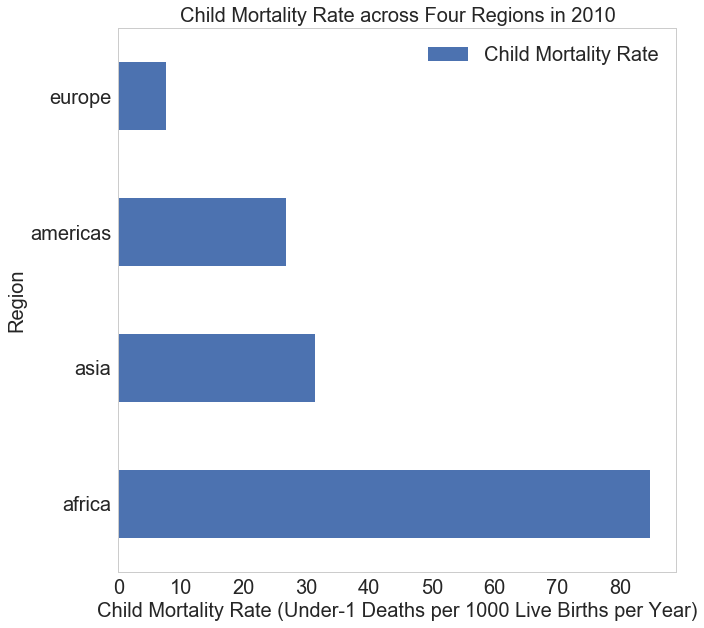

In [676]:
# Sorting and editing chart inspired by this link
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
# https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.locator_params.html

# Group child mortality rate values descendingly into four regions 
four_reg = child_mortality.groupby('Four Regions').mean().sort_values(
    'Child Mortality Rate', ascending = False)

# Plot the horizontal bar chart. This should show the child mortality rate in ascending order
    # broken down by four regions
four_reg.plot(kind = 'barh', figsize = (10,10))
plt.title('Child Mortality Rate across Four Regions in 2010', size = 20) # add the title
plt.xlabel('Child Mortality Rate (Under-1 Deaths per 1000 Live Births per Year)', 
           size = 20) # add label for x-axis and increase the size
plt.ylabel('Region', size = 20) # add label for y-axis and increase the size
plt.locator_params(nbins = 10) # add more ticks to the x-axis for easy reading of values

We can see very clearly that there is an undeniable difference among regions when it comes to child mortality rate. The average number of deaths of children under 1 year of age per 1000 live births is almost 10% (>80 out of 1000 per year) in Africa while the corresponding number for Europe, the continent with the lowest rate of mortality rate is fewer than 1% (fewer than 10 out of 1000). Americas and Asia, the two regions in the middle, exhibit a relatively low child mortality rate (23-30 per 1000 per year). It will be interesting to look at the sub-regions, especially in Africa to find out if this is the trend of the whole continent or if there is one sub-region driving the average number up. Let's do that.

In [677]:
# Remind ourselves what columns we have in 'child_mortality'
child_mortality.columns

Index(['Country', 'Child Mortality Rate', 'Four Regions', 'Eight Regions',
       'World Bank Income Group'],
      dtype='object')

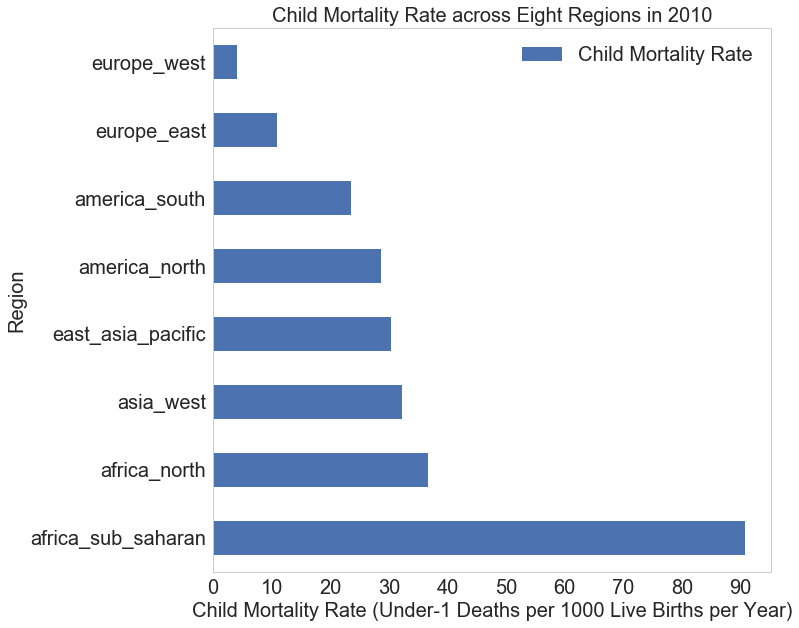

In [678]:
# Plot a similar horizontal bar chart but this time it should show 
    # the child mortality rate broken down to eight regions 
    
# Group child mortality rate values descendingly into eight regions 
eight_reg = child_mortality.groupby('Eight Regions').mean().sort_values(
    'Child Mortality Rate', ascending = False)

# Plot the horizontal bar chart
eight_reg.plot(kind = 'barh', figsize = (10,10))
plt.title('Child Mortality Rate across Eight Regions in 2010', size = 20) # add title
plt.xlabel('Child Mortality Rate (Under-1 Deaths per 1000 Live Births per Year)', 
           size = 20) # add x-axis label and increase the size
plt.ylabel('Region', size = 20) # add y-axis label and increase the siz
plt.locator_params(nbins=10) # add more ticks to the x-axis for easy reading of values

+  Very interesting result! It's obvious that the Sub Saharan Africa exhibits a high number of child mortality rate (>90 child mortality cases per 1000 live birth) while the number of the other African region Africa North is very on par with the trend of most of the rest of the world (about 35 cases). <br>
+  Fascinatingly enough, the book I have been reading "Factfulness" by Hans Rosling discussed that child mortality rate has been improving over the years except for a very few regions and he mentioned Sub Saharan Africa. We can clearly see why! <br>
+  To look further into the range of mortality rate, let's plot a box plot for each region and layer it with a swarm plot to see the value points more clearly.

In [679]:
# Remind ourselves what columns there are in 'child_mortality'
child_mortality.columns

Index(['Country', 'Child Mortality Rate', 'Four Regions', 'Eight Regions',
       'World Bank Income Group'],
      dtype='object')

In [680]:
# Get the descending order values of child mortality rate in each region to add to the box plot
four_reg

,Child Mortality Rate
Four Regions,
africa,84.780435
asia,31.359524
americas,26.737037
europe,7.640000


Text(0.5,1,'Child Mortality Rate across Four Regions in 2010')

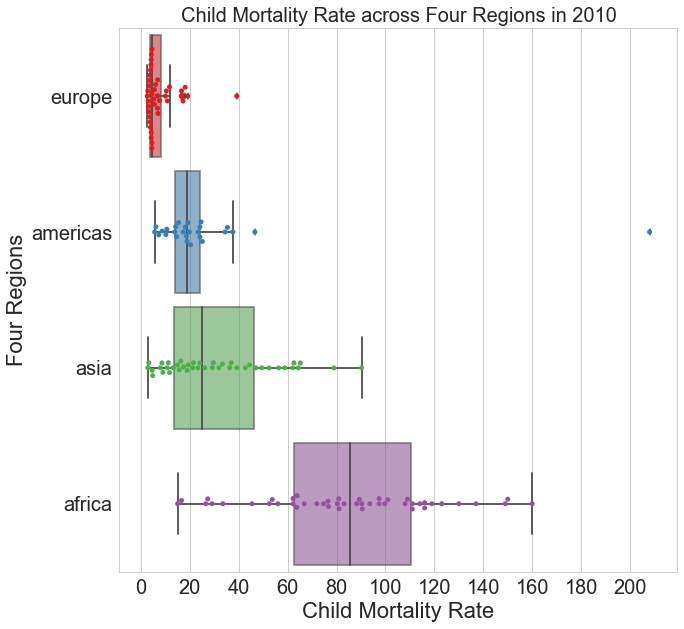

In [681]:
# Seaborn boxplot 
    # https://seaborn.pydata.org/generated/seaborn.boxplot.html
# To set figure size in seaborn 
    # https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# To set title in seaborn 
    # https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
# Seaborn transparency 
    # https://github.com/mwaskom/seaborn/issues/979
# Set axis size
    # https://seaborn.pydata.org/generated/seaborn.set_context.html

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid') # white grid
sns.set_context("notebook", font_scale = 2.0) # increase size of the titles of the axes

# plot horizontal boxplots
sns.boxplot(y = 'Four Regions', # Categories on y-axis
               x = 'Child Mortality Rate', # Categories on y-axis
               data = child_mortality, # dataframe
               order = ['europe', 'americas', 'asia', 'africa'], # order from 'four_reg' above
               orient = 'h', boxprops = dict(alpha = 0.6), # horizontal orientation and 
           width = 0.9, palette = 'Set1', # transparency level # width # color palette
           ).set_title('Child Mortality Rate across Four Regions in 2010', size = 20) # set title

plt.locator_params(nbins=20) # add more ticks to the x-axis for easy reading of values

# plot swarmplots
sns.swarmplot(y = 'Four Regions', # Categories on y-axis
               x = 'Child Mortality Rate', # Categories on y-axis
               data = child_mortality, # dataframe
              order = ['europe', 'americas', 'asia', 'africa'], # order from 'four_reg' above
              palette = 'Set1', orient = 'h').set_title( # horizontal orientation # color palette
                    'Child Mortality Rate across Four Regions in 2010', # set title
                size = 20) # increase the size of the title

This plot gives a similar picture compared to the bar plot; however, we can see very clearly the distribution of mortality rates, the interquartile range(s) (IQR), the medians, and outliers for all regions. <br>
+  **Europe**
> This region has a very small IQR (showned by the width of the box). It not only indicates the smallest child mortality rate but also exhibits a consistent trend. The outlier of Europe stays well within the smaller size of child mortality rate, so there's no need to discuss further. It's worth noting that aside from one outlier, all child mortality rate values are smaller than 20, which is extremely impressive and potentially suggests the advanced development of this region compared to the rest of the world. Furthermore, the swarm plot shows that the majority of points are on the lower end of the box, which proves more convincingly the point made above. Also, since the width of the box plot is very small, it indicates an approximately even rate when it comes to child mortality (most countries have values very close to one another). <br>
+  **Americas** 
> Besides two outliers, all child mortality rate values are smaller than 30, which is also a very positive trend. It's worth noting that even for the countries with the smallest child mortality rate, americas region falls behind europes region as europes region has more countries with even smaller child mortality rate. The boxplot is wider than Europe but not as wide as Asia and Africa, indicating a fairly even rate when it comes to child mortality (the vast majortiy of countries have values close to one another). <br>
+  **Asia** 
> Wider boxplot shows a wider distribution of values with 75% of values are fewer than 50. The maximum child mortality rate is only a bit higher than the median value of Africa. Wider boxplot indicates an uneven distribution of rate (some countries have very small child mortality rates while some countries have much larger values). Interestingly enough, the lowest mortality rate is very comparable to that of Europes and smaller than that of Americas, potentially suggesting a comparable development in some countries in Asia. This can be a topic of interest for future research. <br>
+  **Africa** 
> The boxplot for this region gives a much more granular approach and confirms the finding from the two bar charts above. Such wide width indicates a stagerringly different pictures within the same region. Sub Saharan countries have extremely high child mortality rates, some as high as 160 while countries in North Africa have much lower child mortality rates, some as comparable as those in the lower end of Asia and Americas. 50% of values are above 80, painting a potentially grim picture of the current state of development of such countries.

Just like earlier, let's plot boxplots showing child mortality rates for all eight regions. But before doing so, let's find out which country in Americas has the child mortality rate greater than 200 (the blue outlier in the blue boxplot)

In [682]:
# Filter all rows corresponding to 'americas' from 'child_mortality'
americas = child_mortality[child_mortality['Four Regions'] == 'americas']

# Filter the row corresponding to the child mortality rate value of greater than 200
americas.loc[americas['Child Mortality Rate'] > 200]

,Country,Child Mortality Rate,Four Regions,Eight Regions,World Bank Income Group
71,Haiti,208.0,americas,america_north,Low income


It makes so much sense for this country to be Haiti as Haiti suffered a serious earth quake and extremly low GDP growth in 2010. (https://www.worldvision.org/disaster-relief-news-stories/2010-haiti-earthquake-facts and http://www.worldbank.org/en/country/haiti). It will be interesting to look at the trend in child mortality rate in Haiti to see if the child mortality rate in 2010 is indeed an outlier or is it part of the regular trend. We will address this later.

Now, proceed with plotting child mortality rate for eight regions.

In [683]:
# What columns we have in child_mortality?
child_mortality.columns

Index(['Country', 'Child Mortality Rate', 'Four Regions', 'Eight Regions',
       'World Bank Income Group'],
      dtype='object')

In [684]:
# Get the order of child mortality rate in each of eight regions to add to the plot
eight_reg

,Child Mortality Rate
Eight Regions,
africa_sub_saharan,90.656098
africa_north,36.600000
asia_west,32.222727
east_asia_pacific,30.410000
america_north,28.611765
america_south,23.550000
europe_east,10.904762
europe_west,4.031579


Text(0.5,1,'Child Mortality Rate across Eight Regions in 2010')

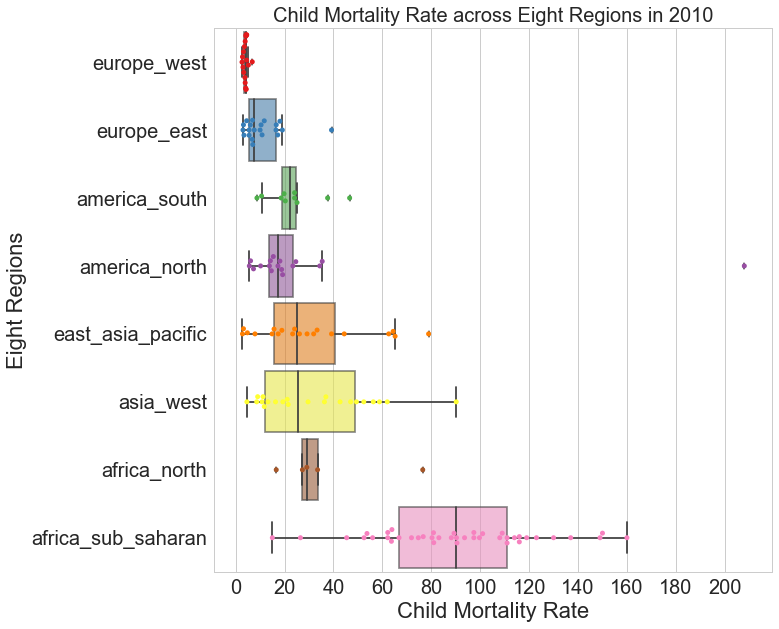

In [685]:
sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid') # set the grid to be white
sns.set_context("notebook", font_scale=2.0) # increase size of axis title

# plot box plots
sns.boxplot(y = 'Eight Regions', # categories of regions on y-axis
               x = 'Child Mortality Rate', # child mortality rate on x-axis
               data = child_mortality, # dataframe
               order = ['europe_west', 'europe_east', # order from 'eight_reg' above
                        'america_south', 'america_north',
                       'east_asia_pacific', 'asia_west', 
                        'africa_north', 'africa_sub_saharan'],
    orient = 'h', boxprops = dict(alpha = 0.6), # horizontal boxplot # transparency level
           width = 0.9, palette = 'Set1', # boxplot width and color palette
           ).set_title('Child Mortality Rate across Eight Regions in 2010', # add a title
                       size = 20) # increase the size of the title

plt.locator_params(nbins=20) # add more ticks to the x-axis for easy reading of values

# plot swarmplots
sns.swarmplot(y = 'Eight Regions', # categories of regions on y-axis
               x = 'Child Mortality Rate', # child mortality rate on x-axis
              data = child_mortality, # dataframe
              order = ['europe_west', 'europe_east', # order from 'eight_reg' above
                       'america_south', 'america_north',
                       'east_asia_pacific', 'asia_west', 
                       'africa_north', 'africa_sub_saharan'],
              palette = 'Set1', # color palette
              orient = 'h').set_title('Child Mortality Rate across Eight Regions in 2010', 
                size = 20)  # horizontal swarm plots, add a tile, 
                            # and increase the size of the title

Two more interesting observations can be drawn from this plot. <br> 
+ The Western European countries have close to zero child mortality rate and much lower compared to the Eastern European countries. <br>
+ The region with the highest child mortality rate is Sub Saharan Africa with more than 50% of countries having the child mortality rate of more than 90. 

Next, let's test to see if we can perform the ANOVA test for the mean child mortality rate across regions. Let's check to see if the distribution of child mortality rate in each region is normally distributed. This is an important assumption of ANOVA (https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php). If this assumption is not met, we will go ahead and carry out the Kruskal-Wallis H Test which does not require normality as an assumption.

In [686]:
# Take a look at the first few rows of 'child_mortality'
child_mortality.head(2)

,Country,Child Mortality Rate,Four Regions,Eight Regions,World Bank Income Group
0,Afghanistan,90.2,asia,asia_west,Low income
1,Albania,16.6,europe,europe_east,Upper middle income


Subset data for each of the four regions so that we can plot the histogram for each region.

In [687]:
# Americas
americas = child_mortality[child_mortality['Four Regions'] == 'americas'].reset_index(drop = True)

# Eurpe
europe = child_mortality[child_mortality['Four Regions'] == 'europe'].reset_index(drop = True)

# Asia
asia = child_mortality[child_mortality['Four Regions'] == 'asia'].reset_index(drop = True)

# Africa
africa = child_mortality[child_mortality['Four Regions'] == 'africa'].reset_index(drop = True)

Plot a histogram of child mortality rate for each region.

Text(0.5,1,'Histogram of Child Mortality Rate in Americas in 2010')

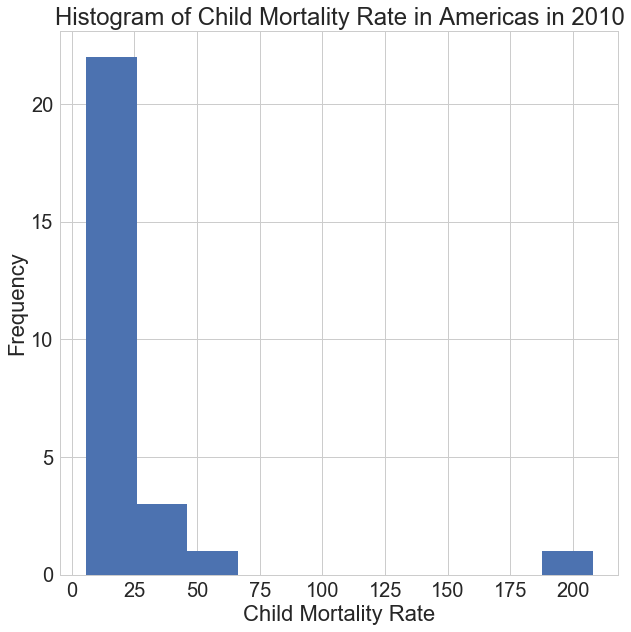

In [688]:
# Histogram of child mortality rate in Americas
americas.hist('Child Mortality Rate')

plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Child Mortality Rate in Americas in 2010')

Text(0.5,1,'Histogram of Child Mortality Rate in Europe in 2010')

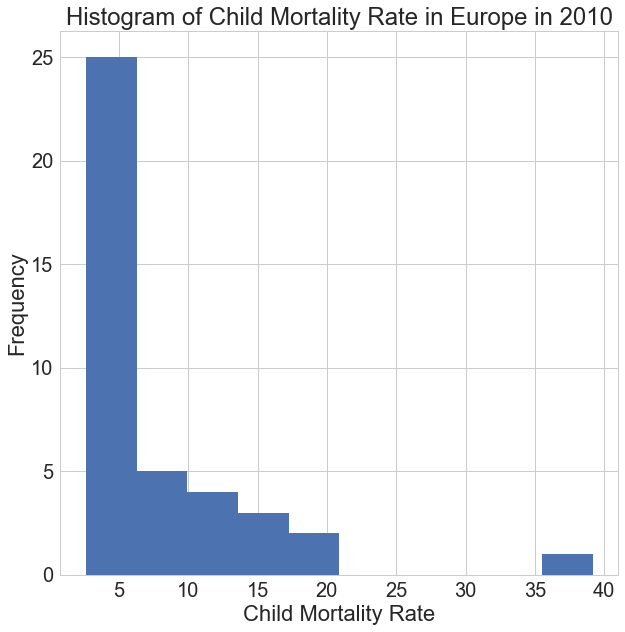

In [689]:
# Histogram of child mortality rate in Europe
europe.hist('Child Mortality Rate')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Child Mortality Rate in Europe in 2010')

Text(0.5,1,'Histogram of Child Mortality Rate in Asia in 2010')

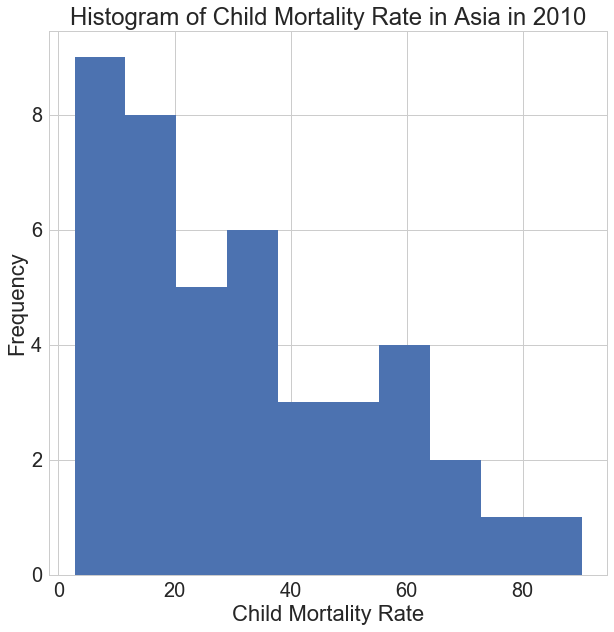

In [690]:
# Histogram of child mortality rate in Asia
asia.hist('Child Mortality Rate')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Child Mortality Rate in Asia in 2010')

Text(0.5,1,'Histogram of Child Mortality Rate in Africa in 2010')

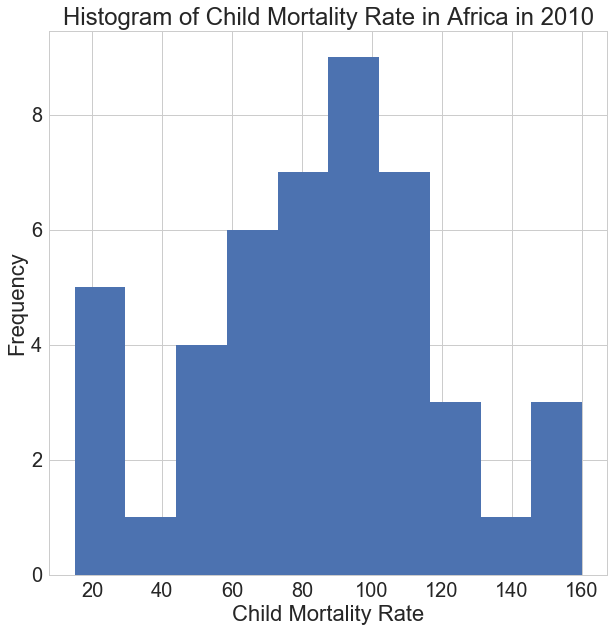

In [691]:
# Histogram of child mortality rate in Africa
africa.hist('Child Mortality Rate')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Child Mortality Rate in Africa in 2010')

Only Africa has a normal distribution. Let's go ahead and carry out the Kruskal-Wallis H Test. 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal). According to the Scipy documentation, this test tests "the null hypothesis that the population median of all of the groups are equal" and it is the nonparametric version of ANOVA. There are also assumptions for the Kruskal-Wallis H Test, let's check if our data meet the assumptions. <br>
(https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php)
(http://www.biostathandbook.com/kruskalwallis.html) <br>

+  Dependent variable is measured at ordinal or continuous level (child mortality is at continuous level => checked) <br>
+  Independent variables: two or more categorical and indendent groups (our four regions => checked) <br>
+  Independece of observations: checked <br>
+  Different groups have the similar distribution and groups with different standard deviations have different distributions. Let's look at the summary statistics and compare those with the histograms for each region to check this.

In [692]:
# Summary statistics regarding child mortality rate of each of the four regions
child_mortality.groupby('Four Regions').describe()

Child Mortality Rate                                             \
                            count       mean        std   min     25%    50%   
Four Regions                                                                   
africa                       46.0  84.780435  35.506761  15.0  62.575  85.65   
americas                     27.0  26.737037  37.562329   5.6  14.000  18.80   
asia                         42.0  31.359524  22.316351   2.8  13.625  25.10   
europe                       40.0   7.640000   6.929269   2.6   3.875   4.50   

                             
                 75%    max  
Four Regions                 
africa        110.50  160.0  
americas       24.35  208.0  
asia           46.35   90.2  
europe          8.20   39.2

Since americas has a clear outlier (Haiti) which can greatly affect the standard deviation, let's drop Haiti and compute the summary statistics again.

In [693]:
# Return the row corresponding to 'Haiti'
americas[americas['Country'] == 'Haiti']

,Country,Child Mortality Rate,Four Regions,Eight Regions,World Bank Income Group
16,Haiti,208.0,americas,america_north,Low income


In [694]:
# Drop Haiti row
americas.drop(16, inplace = True)

In [695]:
# Now, check the summary statistics for americas with Haiti not being in the picture
americas.describe()

,Child Mortality Rate
count,26.000000
mean,19.765385
std,10.127544
min,5.600000
25%,13.900000
50%,18.700000
75%,24.100000
max,46.600000


The standard deviation goes from 37 to 10. What a change. Now we can safely say that the distribution of different groups (Asia, Europe, Americas) have similar shape (from the histograms: right-skewed distribution) and the distribution of the group with different standard deviation (Africa) is different (normal distribution). The fourth assumption is met. Let's go ahead and carry out the Kruskal-Wallis H Test.

In [696]:
# Kruskal test from the 'scipy'
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    
stats.kruskal(americas['Child Mortality Rate'], europe['Child Mortality Rate'], 
               asia['Child Mortality Rate'], africa['Child Mortality Rate'])

KruskalResult(statistic=102.99235987111058, pvalue=3.5317730005966083e-22)

With such an extremely small p-value, we reject the null hypothesis. There is a statistically significant difference of the population median of all the groups (regions) involved for child mortality rate. This confirms our finding earlier and makes our conclusion substantially stronger.

To conclude, there is a striking difference on child mortality rate among different regions in the world in 2010. Europe has the lowest child mortality rate and Africa has the highest. Haiti is the outlier with more than 200 deaths per 1000 live births in 2010, most likely due to the devastating 2010 earthquake. Now, we will move on to the next quesion.

### Question 2: Is improved sanitation associated with a reduction in child mortality? <br>

To answer this question, let's look at the correlation of improved sanitation and child mortality rate, then compute the Pearson correlation and plot a scatter plot to show the relationship between the two.

In [697]:
# Return the correlation pairs for all variables in 'project' dataset
project.corr()

,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
Child Mortality Rate,1.000000,-0.428113,-0.846058,-0.891286
Government Expenditure on Health (USD),-0.428113,1.000000,0.453286,0.530483
Improved Sanitation Proportion,-0.846058,0.453286,1.000000,0.791415
Life Expectancy,-0.891286,0.530483,0.791415,1.000000


We can see that 'Improved Sanitation Proportion' is strongly and negatively associated with 'Child Mortality  Rate', suggesting that improved sanitation is definitely associated with a reduction in child mortality. Let's test the strength of the association and draw the linear fit line on a scatter plot. 

In [698]:
# Pearson correlation 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

stats.pearsonr(project['Improved Sanitation Proportion'],
             project['Child Mortality Rate'])

(-0.84605755659259674, 1.2051906041551455e-43)

Result from the Pearson correlation test confirms that the association is strong, negative, and statistically significant (indicated by an extremely low p-value). Time for the scatterplot to visualize the relationship between these two variables.

Text(0.5,1,'Relationship between Improved Sanitation Proportion and Child Mortality Rate in 2010')

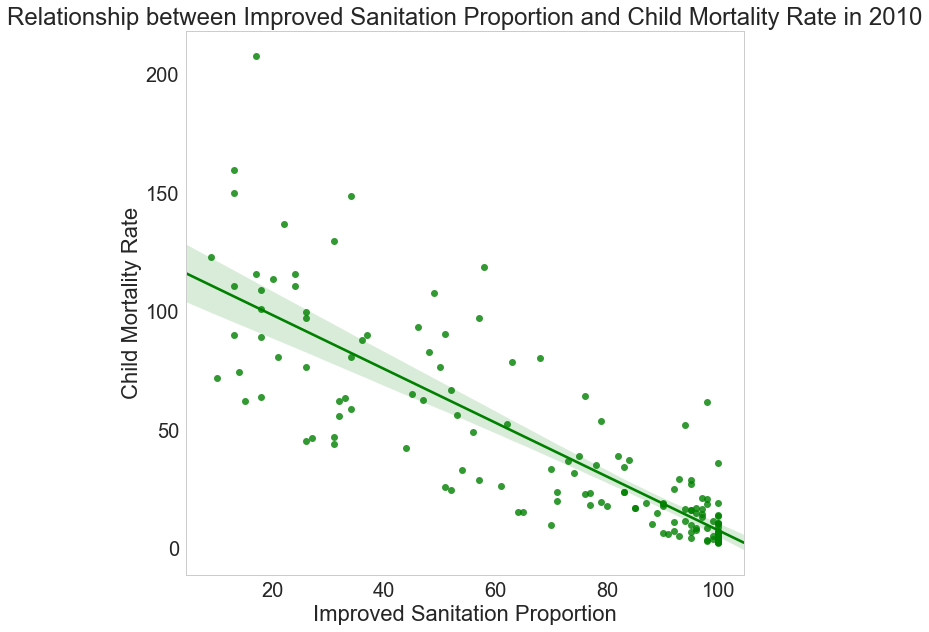

In [699]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
    
sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # white background and remove grid
sns.set_context("notebook", font_scale=2.0) # increase size of axis title 
                                            # and choose 'notebook' context

# plot a regression plot (scatter plot + linear fit)
sns.regplot(x = 'Improved Sanitation Proportion',
            # independent variable:'Improved Sanitation Proportion'
           y = 'Child Mortality Rate', color = 'g', # green color 
            # dependent variable: 'Child Mortality Rate'
           data = project).set_title( # data # set title
    'Relationship between Improved Sanitation Proportion and Child Mortality Rate in 2010') 

The negative association is clear and strong. We can conclude that the higher proportion of population having access to improved sanitation facilities is associated with the lower child mortality rate. Just like before, let's look at the association by region.

Text(0.5,1,'Americas')

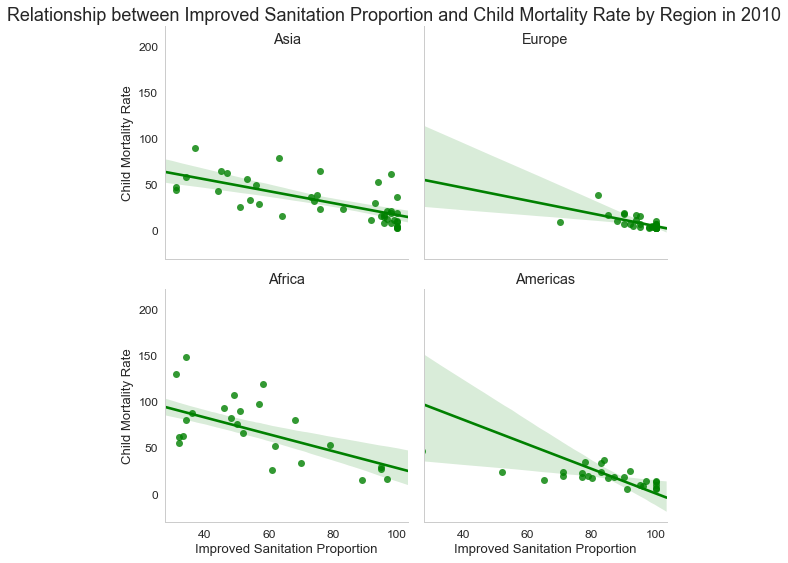

In [700]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
# https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
# https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
sns.set(rc={'figure.figsize':(5,5)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale = 1.2) # increase size of axis title
                                              # choose 'notebook' context
g = sns.FacetGrid(project, col = "Four Regions", # divide plots by regions
                  col_wrap = 2, size = 4) # two columns and size of faceted plots

# scatter plot + linear fit
g = g.map(sns.regplot, 'Improved Sanitation Proportion','Child Mortality Rate', color = 'g')

g.fig.suptitle(
    'Relationship between Improved Sanitation Proportion and Child Mortality Rate by Region in 2010', 
    fontsize = 18) # Main title

# set titles for subplots, adjusting the titles of the first two plots on the first row
    # so that they won't overlap with the title
axes = g.axes.flatten() # 
axes[0].set_title("Asia", y = 0.9)
axes[1].set_title("Europe" , y = 0.9)
axes[2].set_title("Africa")
axes[3].set_title("Americas")

It is very clear that the negative association is reflected in each region. According to the analyses we did earlier, it's not a surprise that the proportion of improved sanitation tends to be higher in Europe and Americas. There are only a few countries in Africa with proportion of improved sanitation greater than 80%. To see the contrast of Europe and Africa, we can employ one more plot, the pair plot broken down by four regions. But first, let's test the strength of the association in each region by using the Pearson test.

In [701]:
# Create four subsets for four regions, remove the outlier Haiti

# Americas
americas_sanitation = project[project['Four Regions'] == 'americas'].reset_index(drop = True)

# Europe
europe_sanitation = project[project['Four Regions'] == 'europe'].reset_index(drop = True)

# Asia
asia_sanitation = project[project['Four Regions'] == 'asia'].reset_index(drop = True)

# Africa
africa_sanitation = project[project['Four Regions'] == 'africa'].reset_index(drop = True)

In [702]:
# Get the row corresponding with Haiti
americas_sanitation[americas_sanitation['Country'] == 'Haiti']

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
16,Haiti,208.0,9.953451,17.0,32.2,americas,america_north,Low income


In [703]:
# Drop Haiti and make the change permanent
americas_sanitation.drop(16, inplace = True)

In [704]:
# Pearson correlation
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
# Americas
stats.pearsonr(x = americas_sanitation['Improved Sanitation Proportion'],
              y = americas_sanitation['Child Mortality Rate'])

(-0.68770345296026558, 0.00010356493075546005)

In [705]:
# Europe
stats.pearsonr(x = europe_sanitation['Improved Sanitation Proportion'],
              y = europe_sanitation['Child Mortality Rate'])

(-0.63552330142848112, 1.0530407683225872e-05)

In [706]:
# Asia
stats.pearsonr(x = asia_sanitation['Improved Sanitation Proportion'],
              y = asia_sanitation['Child Mortality Rate'])

(-0.68559909916605, 5.4436779105670047e-07)

In [707]:
# Africa
stats.pearsonr(x = africa_sanitation['Improved Sanitation Proportion'],
              y = africa_sanitation['Child Mortality Rate'])

(-0.64282655050613313, 1.4570466853980898e-06)

The negative association is strong, consistent, and statistically significant in each case.

Now, let's plot the pair plot broken down by region.

Text(0.5,1,'Relationship between Improved Sanitation and Child Mortality Rate by Region in 2010')

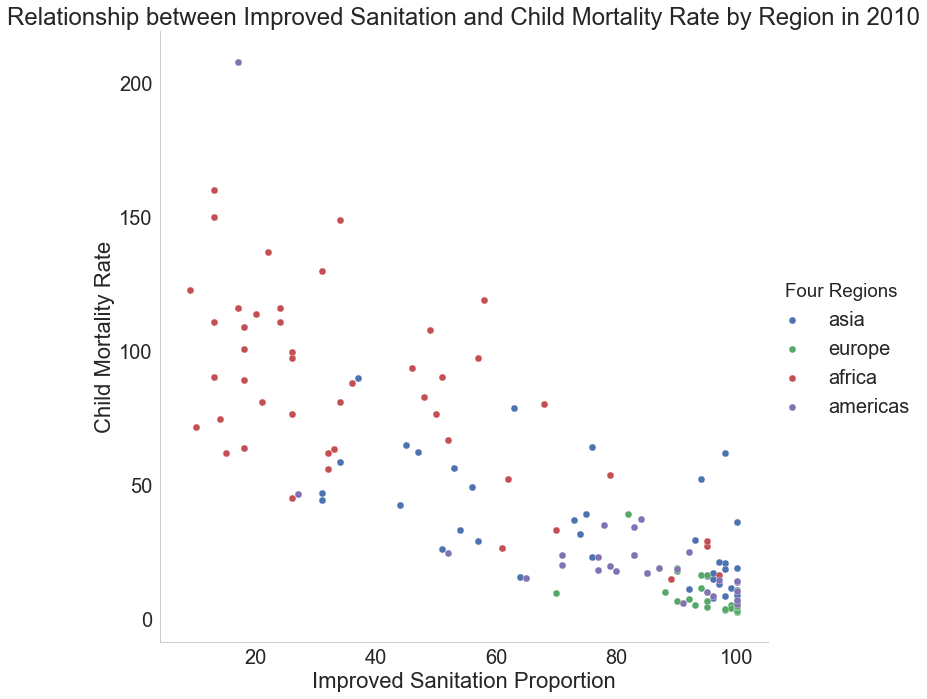

In [708]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set background white and remove grid
sns.set_context("notebook", font_scale=2) # increase size of axis title 
                                          # & set context to 'notebook'

# scatterplot, 'hue' indicates the regions broken down
sns.pairplot(x_vars=['Improved Sanitation Proportion'], # independent variable
             y_vars=['Child Mortality Rate'], data = project, # dependent variabl # data
             hue="Four Regions", # regions and size
             size=10)

plt.title( # add a title
    'Relationship between Improved Sanitation and Child Mortality Rate by Region in 2010')

Clearly , most of the red dots (Africa) are on the left side (lower proportion of population having access to improved sanitation) while all the green dots (Europe) stay on the right side (higher proportion of population having access to improved sanitation). There is only one country in Europe with improved sanitation less than 80%. 

#### Question 3 : Does health spending negatively correlate with child mortality? <br>

Just like before, we will look at the correlation table first, then we will confirm with carrying out Pearson test and plotting the scatter plot, and eventually, we will look at the trend in different regions.

In [709]:
# Correlation table indicating the strength and direction of association 
    # between each pair of 'project'
project.corr()

,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
Child Mortality Rate,1.000000,-0.428113,-0.846058,-0.891286
Government Expenditure on Health (USD),-0.428113,1.000000,0.453286,0.530483
Improved Sanitation Proportion,-0.846058,0.453286,1.000000,0.791415
Life Expectancy,-0.891286,0.530483,0.791415,1.000000


Health spending (Government expenditure per capita on health) is also negatively and weakly correlated with child mortality rate. It means a higher spending on health is associated with a lower child mortality rate. Let's confirm that by performing Pearson correlation test and plotting a scatter plot with a linear fit line.

In [710]:
# Pearson correlation 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
stats.pearsonr(project['Government Expenditure on Health (USD)'],
             project['Child Mortality Rate'])

(-0.42811287597410069, 2.7491302283195621e-08)

The result from the Pearson correlation test shows a weak yet statistically significant negative association. Let's look at the association by region then perform Pearson test for each region.

(0, 220)

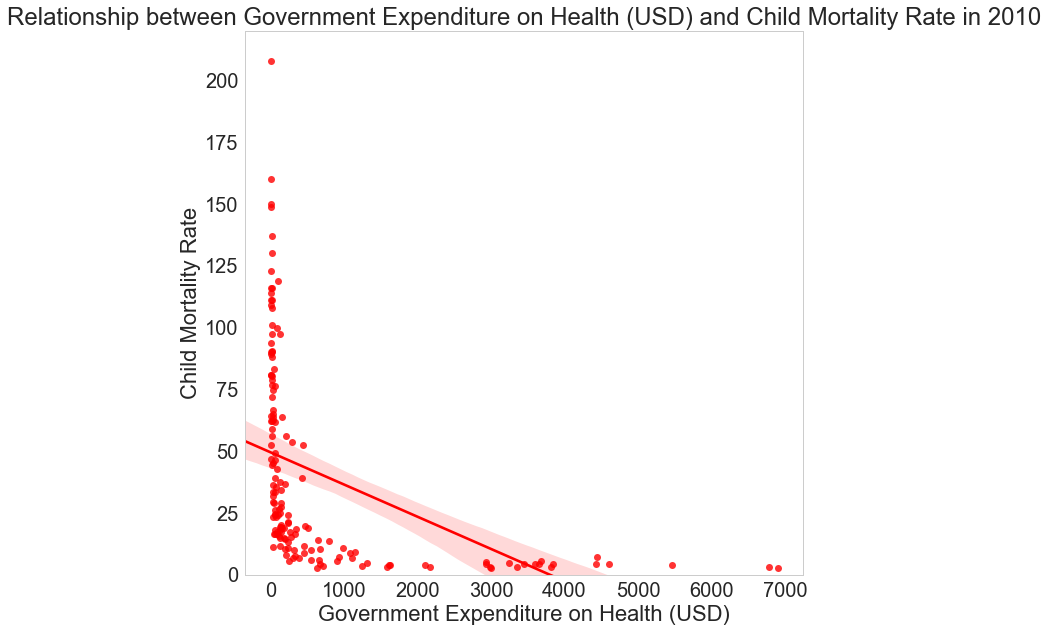

In [711]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale=2.0) # increase size of axis title
                                            # and choose 'notebook' content

# plot a regression plot (scatter plot + linear fit)
sns.regplot(x = 'Government Expenditure on Health (USD)', 
            # independent variable:'Government Expenditure on Health (USD)'
           y = 'Child Mortality Rate', color = 'red', # choose red color
            # dependent variable: 'Child Mortality Rate'
        data = project).set_title( # data # add a title
'Relationship between Government Expenditure on Health (USD) and Child Mortality Rate in 2010') 

plt.ylim(0,220) # limit values of y-axis

Even though the negative association is there, it is very weak ( only -0.4), so the trend is not clear. On the left of the plot, there are many countries with little to no government expenditure on health with apparent difference in child mortality rate. The obvious trend is >1000 USD spent per capita per year is associated with a very low child mortality rate. We can look at the trend further by plotting the scatter plot by regions.

Text(0.5,0.9,'Americas')

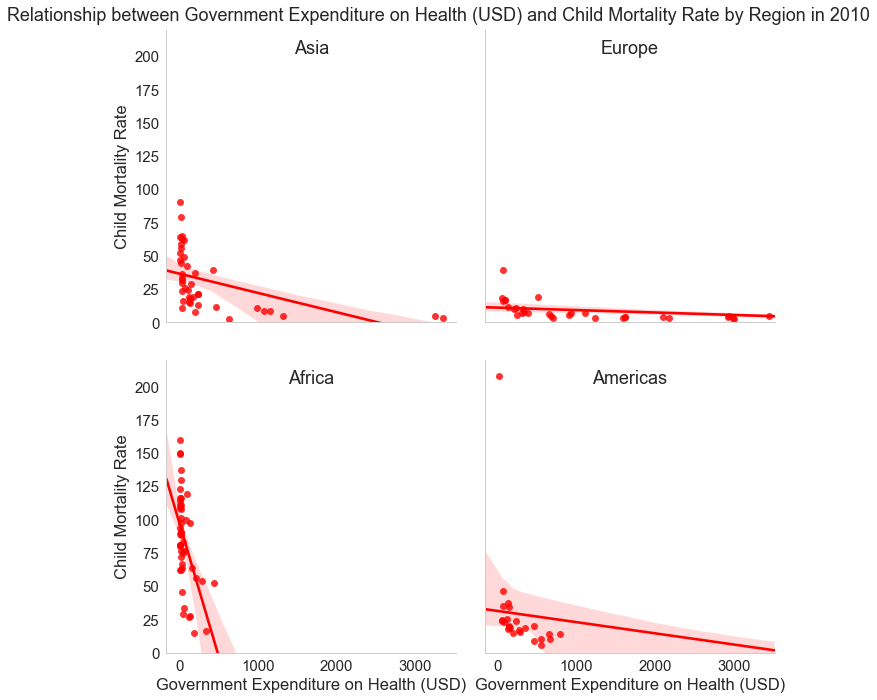

In [712]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
# https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
# https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale=1.5) # increase size of axis title
                                            # choose the 'notebook' context
g = sns.FacetGrid(project, col = "Four Regions", # divide plots by regions
                  col_wrap = 2, size = 5) # two columns and size of faceted plots

# scatter plot + linear fit
g = g.map(sns.regplot, 'Government Expenditure on Health (USD)','Child Mortality Rate', 
          color = 'red') # red color

g.fig.suptitle(
    'Relationship between Government Expenditure on Health (USD) and Child Mortality Rate by Region in 2010', 
    fontsize = 18) # main title

plt.ylim(0,220) # y-axis limit

# set titles for subplots, adjusting the titles of all sub-plots 
axes = g.axes.flatten() 
axes[0].set_title("Asia", y = 0.9)
axes[1].set_title("Europe" , y = 0.9)
axes[2].set_title("Africa", y = 0.9)
axes[3].set_title("Americas", y = 0.9)

These four plots show the negative yet weak association between health spending and child mortality rate. Let's confirm this and see how strong such association is by performing correlation test by region.

In [713]:
# Create four subsets for four regions, remove the outlier Haiti

# Americas
americas_spending = project[project['Four Regions'] == 'americas'].reset_index(drop = True)

# Europe
europe_spending = project[project['Four Regions'] == 'europe'].reset_index(drop = True)

# Asia
asia_spending = project[project['Four Regions'] == 'asia'].reset_index(drop = True)

# Africa
africa_spending = project[project['Four Regions'] == 'africa'].reset_index(drop = True)

In [714]:
# Get the row corresponding to Haiti
americas_spending[americas_spending['Country'] == 'Haiti']

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
16,Haiti,208.0,9.953451,17.0,32.2,americas,america_north,Low income


In [715]:
# Drop Haiti and make the change permanent
americas_spending.drop(16, inplace = True)

In [716]:
# Pearson correlation 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

# Americas
stats.pearsonr(x = americas_spending['Government Expenditure on Health (USD)'],
              y = americas_spending['Child Mortality Rate'])

(-0.50156992346077689, 0.00904013994165212)

In [717]:
# Europe
stats.pearsonr(x = europe_spending['Government Expenditure on Health (USD)'],
              y = europe_spending['Child Mortality Rate'])

(-0.50739425901048729, 0.00083262269672421585)

In [718]:
# Asia
stats.pearsonr(x = asia_spending['Government Expenditure on Health (USD)'],
              y = asia_spending['Child Mortality Rate'])

(-0.48123520014451154, 0.0012539307605853318)

In [719]:
# Africa
stats.pearsonr(x = africa_spending['Government Expenditure on Health (USD)'],
              y = africa_spending['Child Mortality Rate'])

(-0.5333188143724461, 0.00013548134787950031)

Pearson correltion test for each region shows a weak yet statistically significant negative association between child moratlity rate and health spending. Since the association is weak, we find it unnecessary to look at the trend further by region. Let's move on to question 4.

#### Question 4 : Is there a negative correlation between life expectancy and child mortality?

Since these are all numeric data, we will follow the same approach. <br>
+ Investigate the correlation table first and carry out Pearson test <br>
+ Confirm finding with plotting <br>
+ Explore trend(s) in different regions. <br>

In [720]:
# Get the correlation table to see the pairwise association of variables in 'project'
project.corr()

,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
Child Mortality Rate,1.000000,-0.428113,-0.846058,-0.891286
Government Expenditure on Health (USD),-0.428113,1.000000,0.453286,0.530483
Improved Sanitation Proportion,-0.846058,0.453286,1.000000,0.791415
Life Expectancy,-0.891286,0.530483,0.791415,1.000000


Looking at the correlation table, we can see there is a strong negative association between 'Life Expectancy' and 'Child Mortality Rate' (-0.89). It indicates that countries with higher life expectancy tends to have lower child mortality rate. Let's confirm this finding with performing Pearson test and plotting scatter plots with linear fit.

In [721]:
# Pearson correlation 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
stats.pearsonr(project['Life Expectancy'],
             project['Child Mortality Rate'])

(-0.89128586778137775, 2.0227806671483004e-54)

Result from the Pearson correlation test confirms that the association is extremely strong, negative, and statistically significant (indicated by an extremely low p-value). Now, let's plot a scatterplot to visualize the relationship between these two variables.

Text(0.5,1,'Relationship between Life Expectancy and Child Mortality Rate in 2010')

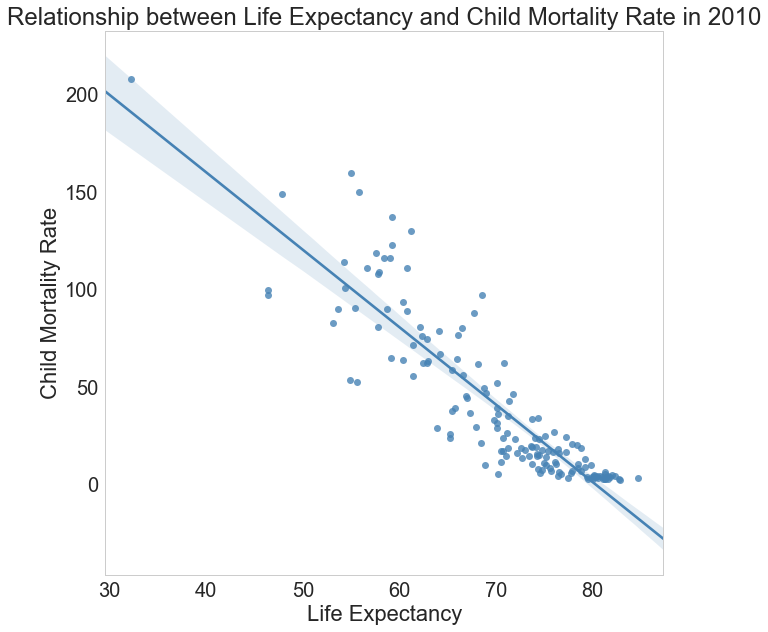

In [722]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale=2.0) # increase size of axis title
                                            # choose "notebook" context

# plot a regression plot (scatter plot + linear fit)
sns.regplot(x = 'Life Expectancy',
            # independent variable:'Life Expectancy'
           y = 'Child Mortality Rate', 
            # dependent variable: 'Child Mortality Rate'
            color = 'steelblue', # choose color
           data = project).set_title( # data # set title
    'Relationship between Life Expectancy and Child Mortality Rate in 2010')

The extremely strong negative association between life expectancy and child mortality rate (strongest out of three independent variables versus the dependent variable) is undoubtedly observed here. Most points cluster around the linear fit line very closely. Also, we can see that the majority of points (countries) are having life expectancy greater than 60, as we noted earlier in the statistical summary. Now, let's look at the break down by region. We will want to plot two types of plots: the four scatter  plots for each region and the pair plot with all regions in one plot. 

Text(0.5,0.9,'Americas')

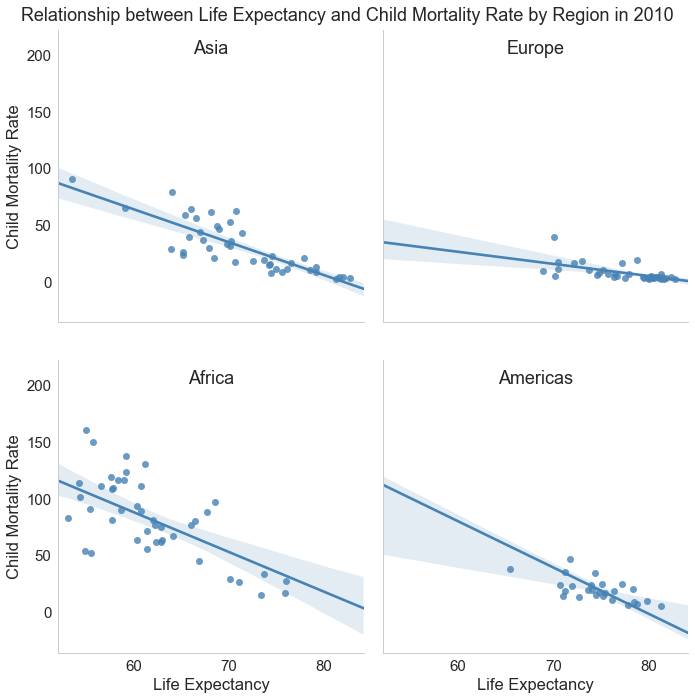

In [723]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
# https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
# https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale=1.5) # increase size of axis title
                                            # choose 'notebook' context
g = sns.FacetGrid(project, col = "Four Regions", # divide plots by regions
                  col_wrap = 2, size = 5) # two columns and size of faceted plots

# scatter plot + linear fit
g = g.map(sns.regplot, 'Life Expectancy','Child Mortality Rate', 
          color = 'steelblue')

g.fig.suptitle(
    'Relationship between Life Expectancy and Child Mortality Rate by Region in 2010', 
    fontsize = 18) # Main title

# set titles for subplots, adjusting the titles of the subplots
axes = g.axes.flatten() 
axes[0].set_title("Asia", y = 0.9)
axes[1].set_title("Europe" , y = 0.9)
axes[2].set_title("Africa", y = 0.9)
axes[3].set_title("Americas", y = 0.9)

Consistently across regions, we see a strong negative association between life expectancy and child mortality rate. Let's confirm it by performing Pearson tests for this pair of variables by region, then we will plot the scatter plot broken down by region just like we did before.

In [724]:
# Create four subsets for four regions, remove the outlier Haiti

# Americas
americas_life_exp = project[project['Four Regions'] == 'americas'].reset_index(drop = True)

# Europe
europe_life_exp = project[project['Four Regions'] == 'europe'].reset_index(drop = True)

# Asia
asia_life_exp = project[project['Four Regions'] == 'asia'].reset_index(drop = True)

# Africa
africa_life_exp = project[project['Four Regions'] == 'africa'].reset_index(drop = True)

In [725]:
# Get the row correponding to Haiti
americas_life_exp[americas_life_exp['Country'] == 'Haiti']

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
16,Haiti,208.0,9.953451,17.0,32.2,americas,america_north,Low income


In [726]:
# Drop Haiti and make the change permanent
americas_life_exp.drop(16, inplace = True)

In [727]:
# Pearson correlation 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

# Americas
stats.pearsonr(x = americas_life_exp['Life Expectancy'],
              y = americas_life_exp['Child Mortality Rate'])

(-0.66173356796101257, 0.00023176837285867843)

In [728]:
# Europe
stats.pearsonr(x = europe_life_exp['Life Expectancy'],
              y = europe_life_exp['Child Mortality Rate'])

(-0.62991244148935266, 1.3291895038250314e-05)

In [729]:
# Asia
stats.pearsonr(x = asia_life_exp['Life Expectancy'],
              y = asia_life_exp['Child Mortality Rate'])

(-0.82141472244733282, 2.6537940929934148e-11)

In [730]:
# Africa
stats.pearsonr(x = africa_life_exp['Life Expectancy'],
              y = africa_life_exp['Child Mortality Rate'])

(-0.68311207295951726, 1.6883030523098086e-07)

The negative association is strong, consistent, and statistically significant in each case. Now, let's plot the pair plot broken down by region.

Text(0.5,1,'Relationship between Life Expectancy and Child Mortality Rate by Region in 2010')

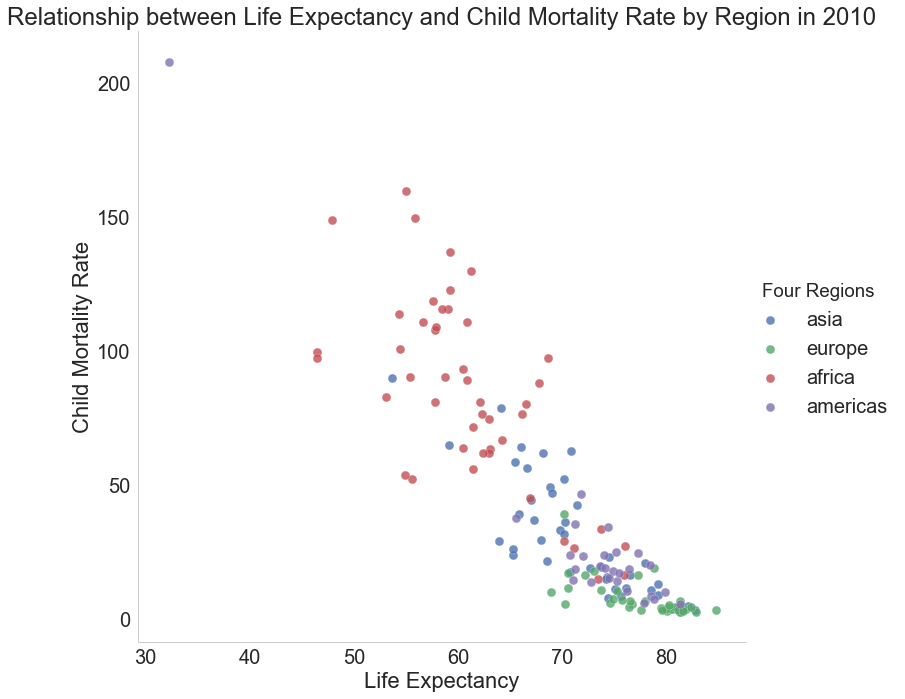

In [731]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/42181317/changing-the-size-of-seaborn-pairplot-markers
# (marker size)

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid
sns.set_context("notebook", font_scale = 2) # increase size of axis title
                                            # choose 'notebook' context

# scatterplot, 'hue' indicates the regions broken down
sns.pairplot(x_vars=['Life Expectancy'], # independent variable
             y_vars=['Child Mortality Rate'], data = project, # dependent variabl # data
             hue = "Four Regions", size = 10, # regions and size
            plot_kws = {'s':80, 'alpha': 0.8}) # marker size and transparency level

plt.title( # add a title
    'Relationship between Life Expectancy and Child Mortality Rate by Region in 2010')

It comes as no surprise that most African countries have generally lower life expectancy and higher child mortality rate. All countries in Europe have high life expectancy (all except one has life expectancy of more than 70 years of age). Countries in America have high life expectancy and low child mortality rate; the two trends are not as extreme as those of Europe. Asian countries have generally high life expectancy with the majority of the countries have life expectancy greater than 60. It will be interesting to see the life expectancy by region utilizing a box plot and a swarm plot and also see the relationship between life expectancy and child mortality rate by income group. Let's do that.

Text(0.5,1,'Life Expectancy across Four Regions in 2010')

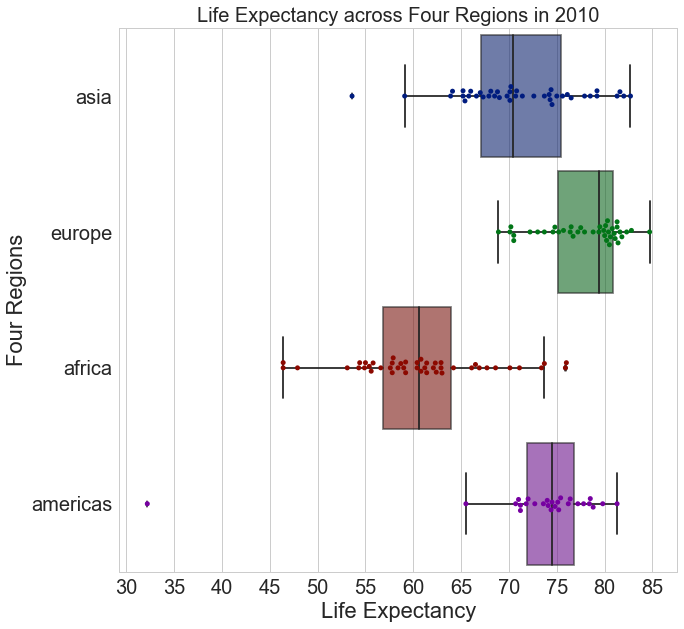

In [732]:
# Seaborn boxplot 
    # https://seaborn.pydata.org/generated/seaborn.boxplot.html
# To set figure size in seaborn 
    # https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# To set title in seaborn 
    # https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
# Seaborn transparency 
    # https://github.com/mwaskom/seaborn/issues/979
# Set axis size
    # https://seaborn.pydata.org/generated/seaborn.set_context.html
    
sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid') # white grid
sns.set_context("notebook", font_scale=2.0) # increase size of axis title
                                            # choose 'notebook' context
# plot box plots
sns.boxplot(y = 'Four Regions', # categories of regions
               x = 'Life Expectancy', 
               data = project, orient = 'h', # horizontal boxplot
            boxprops = dict(alpha = 0.6), # transparency level
           width = 0.9, palette = 'dark', # boxplot width # color palette
    ).set_title('Life Expectancy across Four Regions in 2010', size = 20) # title and title size

plt.locator_params(nbins=20) # add more ticks to x-axis for easier interpretation

# plot swarmplots
sns.swarmplot(y = 'Four Regions', # categories of regions
               x = 'Life Expectancy',
              data = project, palette = 'dark', # data and color palette
orient = 'h').set_title('Life Expectancy across Four Regions in 2010', # horizontal # title
                size = 20) #  size of titke

Aside from the observations we made earlier, two more observations can be seen here.  
+  The majority of countries has high life expectancy. Even for Africa with 25% of countries in the lower end (<57 years of age), 50% of countries in Africa have life expetancy higher than 61 years of age, a very positive trend. 
+  There is one country in Americas with extremely low life expectancy, only 32-33 years of age. From what we observed earlier, since the data come from the year 2010, we suspect this country is Haiti, the country that experienced a devastating earth quake in 2010. Let's confirm our guess.

In [733]:
# Return the row that has life expectancy less than 35 years of age
project[project['Life Expectancy'] < 35]

,Country,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy,Four Regions,Eight Regions,World Bank Income Group
71,Haiti,208.0,9.953451,17.0,32.2,americas,america_north,Low income


It's indeed Haiti. Let's explore the life expectancy of Haiti in the years leading up to 2010 and after 2010 to see if it's indeed an outlier.

In [734]:
# Choose 5 years before and 5 years after 2010 and filter out the dataframe
cols_year = ['2005', '2006','2007', '2008','2009', '2010', '2011', '2012', '2013', '2014', '2015']
Haiti = life_expectancy_original[life_expectancy_original['Country'] == 'Haiti']
Haiti[cols_year]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
95,60.0,60.3,60.8,61.0,61.7,32.2,62.4,62.9,63.4,63.8,64.3


Clearly for Haiti, the year of 2010 is an odd year. Their life expectancy drops 50% from 61.7 years of age to 32.2 years of age. However, with the resilience of the country and the help from the international community, the country's life expectancy rose back to higher than the year of 2009 (62.4 years of age ) and continued to rise during the years after.

Now, we would like to take a step further to explore the relationship between life expectancy and child mortality rate by income group by plotting a pair plot.

Text(0.5,1,'Relationship between Life Expectancy and Child Mortality Rate by Income Group in 2010')

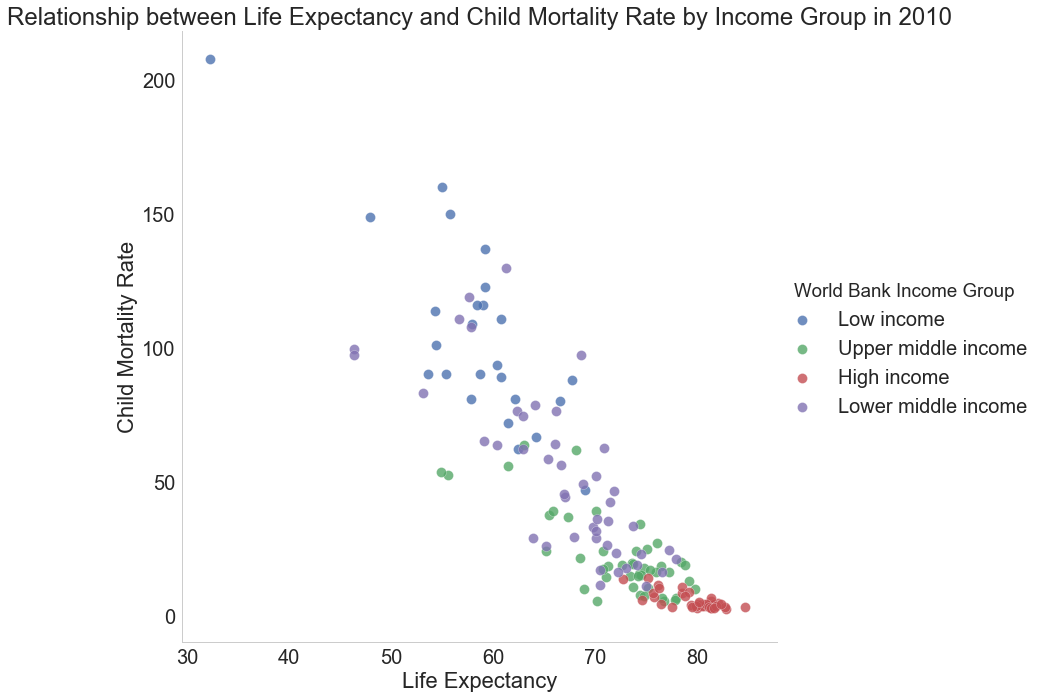

In [735]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
# https://seaborn.pydata.org/generated/seaborn.set_context.html
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/42181317/changing-the-size-of-seaborn-pairplot-markers
# (marker size)

sns.set(rc={'figure.figsize':(10,10)}) # figure size
sns.set_style('whitegrid', {'axes.grid' : False}) # set white background and remove grid 
sns.set_context("notebook", font_scale = 2) # increase size of axis title
                                            # choose 'notebook' context  

# scatterplot, 'hue' indicates the income groups broken down
sns.pairplot(x_vars=['Life Expectancy'], # independent variable
             y_vars=['Child Mortality Rate'], data = project, # dependent variabl # data
             hue = "World Bank Income Group", size = 10, 
            plot_kws = {'s':100, 'alpha': 0.8}) # marker size and transparency level

plt.title( # add a title
    'Relationship between Life Expectancy and Child Mortality Rate by Income Group in 2010')

Several observations can be made from this plot.
+  The outlier is Haiti <br>
+  All high income countries have extremely high life expectancy ( >70 years of age) and low child mortality rate (10-15 deaths out of 1000 live births per year) <br>
+  Upper middle income countries have relatively high life expectancy (majority higher than 65 years of age) and relatively low child mortality rate (majority lower than 40 deaths per 1000 live births per year. <br>
+  About a half of lower middle income countries have moderately high life expectancy (higher than 63 years of age) and about a half have moderately low child mortality rate (lower than 50 deaths per 1000 live births per year). <br>
+  The other half of lower middle income countries exhibit the same trend of the low income countries: low life expectancy (less than 63 years of age) and high child mortality rate (more than 50 deahts per 1000 live births per year).

Overall, there is definitely  a negative correlation between life expectancy and child mortality and the correlation is strong. Upon looking further into the relationship across regions, we see the similarly strong negative correlation. The breakdown of the association by income group was worthy of attention as clear trends were denoted. 

### 3) Multiple Linear Regression Test
  +  Dedependent variable: child mortality rate
  +  Independent variables: improved sanitation, health spending, and life expectancy.

References:
+  https://datatofish.com/multiple-linear-regression-python/
+ http://nbviewer.jupyter.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
+  http://scikit-learn.org/stable/tutorial/basic/tutorial.html
+  https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
+  http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

Perform a multiple regression test will give us a better idea of how the three independent variables relate to the dependent variable and it is also part of the supervised learning mechanism which we can use for future project predicting the child mortality rate based on proportion of improved sanitation, government expenditure on health, and life expectancy. To perform multiple linear regression, we need to use scikit-learn (sklearn) and statsmodel (both were imported at the beginning).

In [736]:
# Review the columns of our dataset
project.columns 

Index(['Country', 'Child Mortality Rate',
       'Government Expenditure on Health (USD)',
       'Improved Sanitation Proportion', 'Life Expectancy', 'Four Regions',
       'Eight Regions', 'World Bank Income Group'],
      dtype='object')

Our independent variables are presented by variable X; our dependent variable is presented by the variable Y. We will fit the multiple linear regression model using scikit-learn. 

In [737]:
# Independent variables
X = project[['Government Expenditure on Health (USD)','Improved Sanitation Proportion',
                'Life Expectancy']]

# Dependent variable
Y = project['Child Mortality Rate']

In [738]:
# Multiple linear regression fit
lm = linear_model.LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now, let's look at the model summary before we interpret the result. 

In [739]:
# Use statsmodels to print out the summary
X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Child Mortality Rate   R-squared:                       0.852
Model:                              OLS   Adj. R-squared:                  0.849
Method:                   Least Squares   F-statistic:                     289.6
Date:                  Sat, 27 Oct 2018   Prob (F-statistic):           2.12e-62
Time:                          16:28:49   Log-Likelihood:                -646.65
No. Observations:                   155   AIC:                             1301.
Df Residuals:                       151   BIC:                             1313.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

**Interpretation** <br>
+  The R-squared and adjusted R-squared are high (0.852 and 0.849). R-squared is proportion of variance explained. It means roughly 85% of the variance can be explained by this model. <br>
+  p-values are extremely small. All p-values are less than 0.05. The highest p-value is for 'Government Expenditure on Health (USD)' (0.03) which is also less than 0.05. This means we can reject the null hypothesis that the coefficient for each of the independent variable is equal to zero. All independent variables (or predictors) are meaningful addition to our model. <br>
+  A unit increase in'Improved Sanitation Proportion' is associated with 0.515 unit decrease in child mortality rate <br>
+  A unit increase in 'Life Expectancy' is associated with 2.80 unit decrease in child mortality rate <br>
+  Notice the model warning that "The condition number is large, 1.6e+04. This might indicate that there are strong multicollinearity or other numerical problems." We suspect there is multicollinearity as the coefficient for 'Government Expenditure on Health (USD)' is positive, suggesting a positive association between health spending and child mortality rate, which is different from our finding earlier. Let's dive deeper into this by looking at the correlation table again.

In [740]:
# Correlation table shows pairwise association of variables in 'project'
project.corr()

,Child Mortality Rate,Government Expenditure on Health (USD),Improved Sanitation Proportion,Life Expectancy
Child Mortality Rate,1.000000,-0.428113,-0.846058,-0.891286
Government Expenditure on Health (USD),-0.428113,1.000000,0.453286,0.530483
Improved Sanitation Proportion,-0.846058,0.453286,1.000000,0.791415
Life Expectancy,-0.891286,0.530483,0.791415,1.000000


We can see that 'Improved Sanitation Proportion' is highly (and positively) correlated with 'Life Expectancy' (0.79). Also, 'Goverment Expenditure on Health (USD)' is positively correlated with 'Life Expectancy' (0.53). Furthermore, 'Improved Sanitation Proportion' is weakly (and positively) correlated with 'Goverment Expenditure on Health (USD)' (0.45). The multicollinearity is apparent. 

Our multiple linear regression model only has three independent variables. For future research, we will include more variables and calculate the variance inflation factor to explore multicollinearity. We plan to build a more robust model in the future; as of now, we can see that each independent variable is negatively correlated with the dependent variable (from previous section), and the multiple linear regression reflects the same trend for the most part. We indeed need to incorporate more variables for better interpretation. 

<a id='limitations'></a>
## Limitations
There are several noteworthy limitations of the project. <br>
> 1) Missing data <br>
+  There were missing data instances that could not be imputed, making it impossible to look at the entire picture of the world (we ended up with 155 countries instead of 193 countries). <br>

> 2) Multicollinearity <br>
+  The moderately strong to strong associations among independent variables prompted the need for more comprehensive future work to address such issue. <br>

> 3) The complexity data wrangling methods <br>
+  A variety of methods was employed beyond the scope of the lectures. This challenge, however, was well worth the effort. Looking back, it might have slowed down the data analysis process and the methods employed might not have been the optimal ones. Further studies are definitely needed. <br>

Despite such limitations, we believe the data was sufficient to prove our findings. This will be discussed in the conclusions section.

<a id='conclusions'></a>
## Conclusions
In this project, we use data from Gapminder to answer four questions about child mortality rate in 2010. The data included in the project are:
  +  Child mortality rate <br>
  +  Improved sanitation <br>
  +  Health spending (Government spending on health) <br>
  +  Life expectancy <br>
  +  Geography <br>
  
The dependent variable is child mortality rate; the independent variables are improved sanitation, health spending, and life expectancy. Geography data were utilized to extract geographical regions needed for exploratory data analysis (EDA). 

The EDA process yields the following findings and results. 

+  There is a substantial difference in child mortality rate acorss world regions with Sub Saharan Africa being the region with the highest child mortality rate and Western Europe being the region with the lowest child mortality rate. 

+  Improved sanitation is negatively correlated with child mortality rate. Countries with higher proportion of the population having access to improved sanitation facilities tend to have lower child mortality rate. This negative association is strong and steady across regions. 

+ Government spending on health weakly and negatively correlate with child mortality rate. Countries with higher spending on health tend to have lower child mortality rate. This negative correlation is weak and relatively consistent across regions.

+  There is an extremely strong association between life expectancy and child mortality rate. Countries with higher life expectancy tend to experience lower child mortality rate. This negative correlation is strong (the strongest out of the three independent variables vs. dependent variable associations) and steady across regions. 

+  Multiple linear regression shows somewhat the same negative correlation. However, due to multicollinearity, the accuracy and robustness of the model is questionable. We need to incorporate more variables in future project to address this limitation.